# **Import Statements**

In [1]:
import sys
root = "C:\\Users\\saman\\OneDrive\\Documents\\GitHub\\Eyelid-Modeling\\"
sys.path.append(root)

from utils.experiment_manager import Experiment
from models.EMG_RNN import EMG_RNN_Wrapper, EMG_RNN
from utils.data_management import Mat2TVT

import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

%load_ext autoreload
%autoreload 2

torch.cuda.is_available()

True

# **Data Reorganization** <br>


In [2]:
eye_bool = np.asarray([True, True, False, True, True, False, False, False])
electrode_list = ['u1', 'u2', 'u3', 'u4', 't2']
marker_list = ['u1', 'u2', 'u3', 'u4', 'u5']
filepath = root + 'eyeliddata.mat'

train = 0.7
val = 0.2
test = 0.1

reorganizer = Mat2TVT(eye_bool, electrode_list, marker_list, filepath)
_, _, identifier = reorganizer.load_data()
X, y = reorganizer.DMVC_norm()
TVT_dict = reorganizer.TVT_split(train, val, test)

# **Run Experiments**

In [ ]:
params = {
    't_win': np.arange(10,51,1, dtype = float),
    't_stride': np.arange(10, 51, 1, dtype = float),
    't_lookahead': np.arange(50, 101, 1, dtype = float),
    'p_transform': np.linspace(0, 1, 100, dtype = float),
    'sigma': np.linspace(0, 5, 100, dtype = float),
    'p_mask': np.linspace(0, 0.5, 100, dtype = float),
    'batch_size': [4, 8, 16, 32, 64, 128],
    'learning_rate': np.linspace(1e-3, 1e-8, 500, dtype = float),
    'dropout': np.linspace(0, 1, 100, dtype = float),
    'RNN_hdim': [4, 8, 16, 32, 64, 128],
    'RNN_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

experiment = Experiment()
model = EMG_RNN_Wrapper()
best_params = experiment(params, TVT_dict, model, n_trials = 400, epochs = 100, patience = 50)

print("Best Params:\n_________________________________________________________________________________________________________")
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

[I 2025-03-13 12:03:51,054] A new study created in memory with name: no-name-f6965c0b-74e7-48c5-a292-1fcdf8a8629c


Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 5161.7%, Avg Marker Error: 136.5%, Avg loss: 1.092768 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2086.6%, Avg Marker Error: 107.9%, Avg loss: 1.009405 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 4586.8%, Avg Marker Error: 132.0%, Avg loss: 1.074551 

[I 2025-03-13 12:08:17,849] Trial 5 finished with value: 1.0300393104553223 and parameters: {'t_win': np.float64(46.0), 't_stride': np.float64(35.0), 't_lookahead': np.float64(70.0), 'p_transform': np.float64(0.31313131313131315), 'sigma': np.float64(2.3737373737373737), 'p_mask': np.float64(0.010101010101010102), 'batch_size': 128, 'learning_rate': np.float64(0.0007374775751503006), 'dropout': np.float64(0.9595959595959597), 'RNN_hdim': 32, 'RNN_depth': 8}. Best is trial 5 with value: 1.0300393104553223.


Validation Error: 
 Max Marker Error: 849.3%, Avg Marker Error: 100.9%, Avg loss: 1.030039 

Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1525.7%, Avg Marker Error: 91.6%, Avg loss: 1.013035 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 3074.5%, Avg Marker Error: 89.5%, Avg loss: 0.957214 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 2491.2%, Avg Marker Error: 96.8%, Avg loss: 1.080559 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3028.6%, Avg Marker Error: 92.4%, Avg loss: 1.003689 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1539.6%, Avg Marker Error: 94.3%, Avg loss: 1.077687 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1757.4%, Avg Marker Error: 90.2%, Avg loss: 1.020012 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 2814.4%, Avg Marker E

[I 2025-03-13 12:08:43,880] Trial 8 finished with value: 1.0113893747329712 and parameters: {'t_win': np.float64(38.0), 't_stride': np.float64(26.0), 't_lookahead': np.float64(70.0), 'p_transform': np.float64(0.6666666666666667), 'sigma': np.float64(4.646464646464646), 'p_mask': np.float64(0.3535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.00033868396793587175), 'dropout': np.float64(0.23232323232323235), 'RNN_hdim': 16, 'RNN_depth': 4}. Best is trial 8 with value: 1.0113893747329712.


Validation Error: 
 Max Marker Error: 1771.5%, Avg Marker Error: 90.1%, Avg loss: 1.019186 

Stopped early after epoch: 22
Done!
Validation Error: 
 Max Marker Error: 2870.0%, Avg Marker Error: 92.1%, Avg loss: 1.000890 

Epoch 19
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 780.0%, Avg Marker Error: 95.1%, Avg loss: 1.065817 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1154.4%, Avg Marker Error: 94.6%, Avg loss: 1.058382 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3180.1%, Avg Marker Error: 89.0%, Avg loss: 0.950419 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1845.1%, Avg Marker Error: 94.5%, Avg loss: 1.063868 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1458.0%, Avg Marker Error: 91.1%, Avg loss: 1.012402 

Epoch 23
-------------------------------
Validation Error: 
 Max Marke

[I 2025-03-13 12:09:16,248] Trial 11 finished with value: 0.9942654967308044 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(19.0), 't_lookahead': np.float64(84.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(4.191919191919192), 'p_mask': np.float64(0.19191919191919193), 'batch_size': 64, 'learning_rate': np.float64(0.0001543170741482965), 'dropout': np.float64(0.020202020202020204), 'RNN_hdim': 16, 'RNN_depth': 6}. Best is trial 11 with value: 0.9942654967308044.


Validation Error: 
 Max Marker Error: 3390.0%, Avg Marker Error: 91.7%, Avg loss: 1.001268 

Stopped early after epoch: 19
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1755.8%, Avg Marker Error: 90.8%, Avg loss: 1.013175 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 4382.7%, Avg Marker Error: 90.7%, Avg loss: 0.970963 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 1654.1%, Avg Marker Error: 91.6%, Avg loss: 1.075487 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1507.5%, Avg Marker Error: 93.8%, Avg loss: 1.076193 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 4299.6%, Avg Marker Error: 90.0%, Avg loss: 0.969880 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 1391.2%, Avg Marker Error: 91.0%, Avg loss: 1.011949 

Epoch 26
-------------------------------
Validation Error: 
 Max Mark

[I 2025-03-13 12:11:10,635] Trial 1 finished with value: 0.9423686265945435 and parameters: {'t_win': np.float64(11.0), 't_stride': np.float64(38.0), 't_lookahead': np.float64(66.0), 'p_transform': np.float64(0.8383838383838385), 'sigma': np.float64(3.8383838383838382), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 64, 'learning_rate': np.float64(0.00025251248496993984), 'dropout': np.float64(0.6767676767676768), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 1 with value: 0.9423686265945435.


Validation Error: 
 Max Marker Error: 3408.8%, Avg Marker Error: 88.2%, Avg loss: 0.960835 

Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2884.1%, Avg Marker Error: 94.7%, Avg loss: 1.029147 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 3326.0%, Avg Marker Error: 97.7%, Avg loss: 1.132841 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2399.3%, Avg Marker Error: 96.0%, Avg loss: 1.121470 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1436.5%, Avg Marker Error: 90.7%, Avg loss: 1.010359 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1056.8%, Avg Marker Error: 93.4%, Avg loss: 1.054649 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 2130.6%, Avg Marker Error: 91.0%, Avg loss: 1.070710 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 4236.7%, Avg Marker Er

[I 2025-03-13 12:13:24,829] Trial 6 finished with value: 1.0182965993881226 and parameters: {'t_win': np.float64(41.0), 't_stride': np.float64(42.0), 't_lookahead': np.float64(81.0), 'p_transform': np.float64(0.8989898989898991), 'sigma': np.float64(2.0707070707070705), 'p_mask': np.float64(0.42424242424242425), 'batch_size': 16, 'learning_rate': np.float64(0.0007515054909819639), 'dropout': np.float64(0.27272727272727276), 'RNN_hdim': 64, 'RNN_depth': 3}. Best is trial 1 with value: 0.9423686265945435.


Validation Error: 
 Max Marker Error: 2151.7%, Avg Marker Error: 102.0%, Avg loss: 1.070535 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 2664.8%, Avg Marker Error: 91.1%, Avg loss: 1.045991 

Stopped early after epoch: 21
Done!


[I 2025-03-13 12:13:25,667] Trial 10 pruned. 


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1931.5%, Avg Marker Error: 90.1%, Avg loss: 1.016161 

Epoch 1
-------------------------------


[I 2025-03-13 12:13:29,880] Trial 12 pruned. 


Validation Error: 
 Max Marker Error: 1294.5%, Avg Marker Error: 93.2%, Avg loss: 1.081627 

Epoch 1
-------------------------------


[I 2025-03-13 12:13:31,185] Trial 20 pruned. 


Validation Error: 
 Max Marker Error: 2969.5%, Avg Marker Error: 112.4%, Avg loss: 1.067754 



[I 2025-03-13 12:13:31,387] Trial 15 pruned. 


Validation Error: 
 Max Marker Error: 1830.9%, Avg Marker Error: 93.3%, Avg loss: 1.064425 

Epoch 1
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:13:35,558] Trial 19 pruned. 


Validation Error: 
 Max Marker Error: 2310.6%, Avg Marker Error: 99.6%, Avg loss: 1.073351 

Epoch 1
-------------------------------


[I 2025-03-13 12:13:38,871] Trial 22 pruned. 


Validation Error: 
 Max Marker Error: 5110.6%, Avg Marker Error: 114.5%, Avg loss: 1.082444 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1926.5%, Avg Marker Error: 91.2%, Avg loss: 0.972710 

Epoch 19
-------------------------------


[I 2025-03-13 12:13:44,533] Trial 0 pruned. 


Validation Error: 
 Max Marker Error: 3646.6%, Avg Marker Error: 95.4%, Avg loss: 1.093714 

Epoch 1
-------------------------------


[I 2025-03-13 12:13:55,100] Trial 3 pruned. 


Validation Error: 
 Max Marker Error: 1096.1%, Avg Marker Error: 93.1%, Avg loss: 1.055857 

Epoch 1
-------------------------------


[I 2025-03-13 12:13:55,661] Trial 4 pruned. 


Validation Error: 
 Max Marker Error: 3091.7%, Avg Marker Error: 95.6%, Avg loss: 1.106434 

Epoch 1
-------------------------------


[I 2025-03-13 12:13:59,812] Trial 13 pruned. 


Validation Error: 
 Max Marker Error: 1219.6%, Avg Marker Error: 95.1%, Avg loss: 1.071209 

Epoch 1
-------------------------------


[I 2025-03-13 12:14:08,104] Trial 7 pruned. 


Validation Error: 
 Max Marker Error: 1775.0%, Avg Marker Error: 92.9%, Avg loss: 1.114519 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1446.8%, Avg Marker Error: 96.0%, Avg loss: 1.019671 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1965.7%, Avg Marker Error: 107.4%, Avg loss: 1.035512 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3424.2%, Avg Marker Error: 111.5%, Avg loss: 1.009876 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 2424.9%, Avg Marker Error: 108.6%, Avg loss: 1.049621 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3237.6%, Avg Marker Error: 91.4%, Avg loss: 0.975753 

Epoch 11
-------------------------------


[I 2025-03-13 12:14:20,572] Trial 24 pruned. 


Validation Error: 
 Max Marker Error: 3078.8%, Avg Marker Error: 115.8%, Avg loss: 1.163244 

Epoch 1
-------------------------------


[I 2025-03-13 12:14:25,392] Trial 28 pruned. 


Validation Error: 
 Max Marker Error: 5887.3%, Avg Marker Error: 145.7%, Avg loss: 1.208762 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2175.3%, Avg Marker Error: 107.2%, Avg loss: 1.047511 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3163.2%, Avg Marker Error: 105.9%, Avg loss: 1.035269 

Epoch 2
-------------------------------


[I 2025-03-13 12:14:32,029] Trial 33 pruned. 


Validation Error: 
 Max Marker Error: 3979.1%, Avg Marker Error: 139.7%, Avg loss: 1.221660 

Validation Error: 
 Max Marker Error: 1557.3%, Avg Marker Error: 103.3%, Avg loss: 1.052612 

Epoch 2
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:14:33,965] Trial 32 pruned. 


Validation Error: 
 Max Marker Error: 3280.1%, Avg Marker Error: 118.4%, Avg loss: 1.102291 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1777.7%, Avg Marker Error: 96.6%, Avg loss: 1.044688 

Epoch 2
-------------------------------


[I 2025-03-13 12:14:38,585] Trial 31 pruned. 


Validation Error: 
 Max Marker Error: 5665.1%, Avg Marker Error: 128.5%, Avg loss: 1.114611 



[I 2025-03-13 12:14:39,536] Trial 17 pruned. 


Validation Error: 
 Max Marker Error: 1814.4%, Avg Marker Error: 95.2%, Avg loss: 1.125851 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1285.5%, Avg Marker Error: 97.9%, Avg loss: 1.023279 

Epoch 3
-------------------------------


[I 2025-03-13 12:14:44,903] Trial 27 pruned. 


Validation Error: 
 Max Marker Error: 2101.0%, Avg Marker Error: 104.0%, Avg loss: 1.051628 

Validation Error: 
 Max Marker Error: 2983.6%, Avg Marker Error: 94.2%, Avg loss: 1.011487 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4759.1%, Avg Marker Error: 112.0%, Avg loss: 1.037256 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2571.6%, Avg Marker Error: 96.2%, Avg loss: 0.924608 

Epoch 21
-------------------------------


[I 2025-03-13 12:14:49,477] Trial 34 pruned. 


Validation Error: 
 Max Marker Error: 2580.0%, Avg Marker Error: 119.3%, Avg loss: 1.063541 

Epoch 1
-------------------------------


[I 2025-03-13 12:14:51,557] Trial 37 pruned. 


Validation Error: 
 Max Marker Error: 3571.0%, Avg Marker Error: 115.5%, Avg loss: 1.050271 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3368.6%, Avg Marker Error: 120.6%, Avg loss: 1.143051 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1734.6%, Avg Marker Error: 98.7%, Avg loss: 1.026019 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3956.7%, Avg Marker Error: 98.6%, Avg loss: 1.036988 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2450.0%, Avg Marker Error: 100.9%, Avg loss: 1.024880 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3111.2%, Avg Marker Error: 98.9%, Avg loss: 1.019159 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1874.8%, Avg Marker Error: 96.1%, Avg loss: 1.034140 

Epoch 2
-------------------------------


[I 2025-03-13 12:15:02,803] Trial 16 pruned. 


Validation Error: 
 Max Marker Error: 1232.7%, Avg Marker Error: 99.7%, Avg loss: 1.061231 

Validation Error: 
 Max Marker Error: 2998.5%, Avg Marker Error: 108.8%, Avg loss: 1.034440 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2624.0%, Avg Marker Error: 96.5%, Avg loss: 1.016238 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1369.9%, Avg Marker Error: 96.7%, Avg loss: 1.026151 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 3230.9%, Avg Marker Error: 93.5%, Avg loss: 1.015225 

Epoch 4
-------------------------------


[I 2025-03-13 12:15:12,152] Trial 41 pruned. 


Validation Error: 
 Max Marker Error: 4444.1%, Avg Marker Error: 120.3%, Avg loss: 1.069430 



[I 2025-03-13 12:15:13,190] Trial 9 pruned. 


Validation Error: 
 Max Marker Error: 2237.4%, Avg Marker Error: 95.6%, Avg loss: 1.079676 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2370.6%, Avg Marker Error: 93.5%, Avg loss: 1.031098 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2512.0%, Avg Marker Error: 104.3%, Avg loss: 1.015520 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1935.6%, Avg Marker Error: 96.5%, Avg loss: 1.007004 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1725.2%, Avg Marker Error: 87.8%, Avg loss: 0.859194 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 2688.2%, Avg Marker Error: 93.5%, Avg loss: 1.010420 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2895.5%, Avg Marker Error: 90.9%, Avg loss: 0.998027 

Epoch 12
-------------------------------
Validation Error: 
 Max Ma

[I 2025-03-13 12:15:24,148] Trial 43 pruned. 


Validation Error: 
 Max Marker Error: 2666.4%, Avg Marker Error: 91.7%, Avg loss: 1.003576 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2619.9%, Avg Marker Error: 122.9%, Avg loss: 1.083196 



[I 2025-03-13 12:15:24,655] Trial 42 pruned. 


Validation Error: 
 Max Marker Error: 2645.6%, Avg Marker Error: 125.3%, Avg loss: 1.081478 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2455.3%, Avg Marker Error: 93.6%, Avg loss: 1.019172 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1992.8%, Avg Marker Error: 101.2%, Avg loss: 1.006624 

Epoch 5
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1502.7%, Avg Marker Error: 97.3%, Avg loss: 1.013811 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1875.6%, Avg Marker Error: 98.2%, Avg loss: 1.027155 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2527.3%, Avg Marker Error: 94.0%, Avg loss: 1.019802 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1449.0%, Avg Marker Error: 100.7%, Avg loss: 1.015799 

Epoch 2
-------------------------------
Validation Error: 
 Max Ma

[I 2025-03-13 12:15:34,922] Trial 21 pruned. 


Validation Error: 
 Max Marker Error: 1371.3%, Avg Marker Error: 103.0%, Avg loss: 1.050668 



[I 2025-03-13 12:15:35,668] Trial 18 pruned. 


Validation Error: 
 Max Marker Error: 1854.6%, Avg Marker Error: 97.6%, Avg loss: 1.134084 

Validation Error: 
 Max Marker Error: 3328.7%, Avg Marker Error: 93.1%, Avg loss: 1.029890 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 4757.1%, Avg Marker Error: 90.9%, Avg loss: 0.985465 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1767.5%, Avg Marker Error: 99.0%, Avg loss: 1.004071 

Epoch 6
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1410.4%, Avg Marker Error: 92.5%, Avg loss: 1.007340 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1351.7%, Avg Marker Error: 96.3%, Avg loss: 1.023739 

Epoch 5
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3712.3%, Avg Marker Error: 112.3%, Avg loss: 1.046391 

Epoch 2
-------------------------------
Validation Error: 
 Max Mark

[I 2025-03-13 12:16:05,257] Trial 38 pruned. 


Validation Error: 
 Max Marker Error: 2369.2%, Avg Marker Error: 93.2%, Avg loss: 1.019303 

Validation Error: 
 Max Marker Error: 1542.5%, Avg Marker Error: 96.0%, Avg loss: 1.026413 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 2163.4%, Avg Marker Error: 95.1%, Avg loss: 1.031993 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 3332.5%, Avg Marker Error: 91.5%, Avg loss: 1.060789 

Epoch 7
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2575.9%, Avg Marker Error: 96.6%, Avg loss: 0.995475 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 6424.6%, Avg Marker Error: 99.3%, Avg loss: 1.030588 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 3910.0%, Avg Marker Error: 93.1%, Avg loss: 1.028784 

Epoch 9
-------------------------------


[I 2025-03-13 12:16:14,795] Trial 45 pruned. 


Validation Error: 
 Max Marker Error: 5677.6%, Avg Marker Error: 95.2%, Avg loss: 1.078541 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3194.4%, Avg Marker Error: 91.5%, Avg loss: 0.963219 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1300.1%, Avg Marker Error: 92.1%, Avg loss: 0.999805 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2997.3%, Avg Marker Error: 103.5%, Avg loss: 0.946755 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 2744.4%, Avg Marker Error: 95.8%, Avg loss: 0.990153 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1758.8%, Avg Marker Error: 93.8%, Avg loss: 1.042424 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 5125.4%, Avg Marker Error: 99.2%, Avg loss: 1.027078 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2226.4%, Avg Marker Error: 

[I 2025-03-13 12:16:22,631] Trial 30 pruned. 


Validation Error: 
 Max Marker Error: 1365.3%, Avg Marker Error: 95.5%, Avg loss: 1.032228 

Validation Error: 
 Max Marker Error: 3400.1%, Avg Marker Error: 93.6%, Avg loss: 1.028633 

Epoch 10
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3808.5%, Avg Marker Error: 92.5%, Avg loss: 0.967172 

Epoch 6
-------------------------------


[I 2025-03-13 12:16:27,450] Trial 25 pruned. 


Validation Error: 
 Max Marker Error: 1759.5%, Avg Marker Error: 95.1%, Avg loss: 1.055997 

Validation Error: 
 Max Marker Error: 1525.7%, Avg Marker Error: 99.0%, Avg loss: 1.050766 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2908.1%, Avg Marker Error: 96.4%, Avg loss: 0.992736 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 4856.8%, Avg Marker Error: 99.5%, Avg loss: 1.026721 

Epoch 10
-------------------------------


[I 2025-03-13 12:16:33,900] Trial 26 pruned. 


Validation Error: 
 Max Marker Error: 1548.1%, Avg Marker Error: 95.5%, Avg loss: 1.025538 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3981.9%, Avg Marker Error: 95.0%, Avg loss: 1.038141 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1468.8%, Avg Marker Error: 93.1%, Avg loss: 1.036491 

Epoch 6
-------------------------------


[I 2025-03-13 12:16:39,774] Trial 49 pruned. 


Validation Error: 
 Max Marker Error: 1239.4%, Avg Marker Error: 95.2%, Avg loss: 1.069547 

Validation Error: 
 Max Marker Error: 1605.5%, Avg Marker Error: 91.9%, Avg loss: 0.996175 

Epoch 6
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3346.4%, Avg Marker Error: 96.0%, Avg loss: 0.988915 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 4558.8%, Avg Marker Error: 102.0%, Avg loss: 1.040913 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 3688.7%, Avg Marker Error: 93.8%, Avg loss: 1.028599 

Epoch 12
-------------------------------


[I 2025-03-13 12:16:47,854] Trial 47 pruned. 


Validation Error: 
 Max Marker Error: 2227.3%, Avg Marker Error: 113.8%, Avg loss: 1.097230 



[I 2025-03-13 12:16:49,075] Trial 44 pruned. 


Validation Error: 
 Max Marker Error: 1390.9%, Avg Marker Error: 92.9%, Avg loss: 1.037518 

Validation Error: 
 Max Marker Error: 1804.9%, Avg Marker Error: 88.6%, Avg loss: 0.838658 

Validation Error: 
 Max Marker Error: 2575.5%, Avg Marker Error: 94.6%, Avg loss: 1.002994 

Epoch 25
-------------------------------
Epoch 7
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4127.2%, Avg Marker Error: 96.4%, Avg loss: 0.992428 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 4055.0%, Avg Marker Error: 110.3%, Avg loss: 1.082196 

Epoch 12
-------------------------------


[I 2025-03-13 12:16:57,191] Trial 52 pruned. 


Validation Error: 
 Max Marker Error: 1107.8%, Avg Marker Error: 97.3%, Avg loss: 1.063825 

Validation Error: 
 Max Marker Error: 3719.6%, Avg Marker Error: 93.6%, Avg loss: 1.029449 

Epoch 13
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1261.7%, Avg Marker Error: 100.4%, Avg loss: 1.032424 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1684.7%, Avg Marker Error: 91.5%, Avg loss: 1.004727 

Epoch 7
-------------------------------


[I 2025-03-13 12:17:04,735] Trial 56 pruned. 


Validation Error: 
 Max Marker Error: 1727.2%, Avg Marker Error: 115.0%, Avg loss: 1.076585 

Validation Error: 
 Max Marker Error: 3657.0%, Avg Marker Error: 97.8%, Avg loss: 1.004217 

Epoch 14
-------------------------------


[I 2025-03-13 12:17:06,435] Trial 53 pruned. 


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1014.1%, Avg Marker Error: 97.4%, Avg loss: 1.064107 

Validation Error: 
 Max Marker Error: 3852.0%, Avg Marker Error: 95.7%, Avg loss: 1.009247 

Epoch 13
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3782.4%, Avg Marker Error: 91.5%, Avg loss: 1.012261 

Epoch 14
-------------------------------


[I 2025-03-13 12:17:13,076] Trial 58 pruned. 


Validation Error: 
 Max Marker Error: 1658.0%, Avg Marker Error: 106.4%, Avg loss: 1.069150 

Epoch 1
-------------------------------


[I 2025-03-13 12:17:14,736] Trial 57 pruned. 


Validation Error: 
 Max Marker Error: 3128.6%, Avg Marker Error: 127.6%, Avg loss: 1.123861 

Validation Error: 
 Max Marker Error: 3452.3%, Avg Marker Error: 91.2%, Avg loss: 0.969176 

Epoch 14
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3379.9%, Avg Marker Error: 96.0%, Avg loss: 0.997481 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 3433.3%, Avg Marker Error: 106.6%, Avg loss: 1.063415 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 2897.8%, Avg Marker Error: 95.4%, Avg loss: 0.993419 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2310.9%, Avg Marker Error: 99.4%, Avg loss: 1.047697 

Epoch 2
-------------------------------


[I 2025-03-13 12:17:20,119] Trial 55 pruned. 


Validation Error: 
 Max Marker Error: 2493.3%, Avg Marker Error: 94.0%, Avg loss: 1.036264 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2926.1%, Avg Marker Error: 97.0%, Avg loss: 1.069541 

Validation Error: 
 Max Marker Error: 1997.5%, Avg Marker Error: 89.9%, Avg loss: 0.821957 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 3697.8%, Avg Marker Error: 93.9%, Avg loss: 1.024507 

Epoch 15
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1616.6%, Avg Marker Error: 91.8%, Avg loss: 0.996765 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2075.8%, Avg Marker Error: 96.6%, Avg loss: 1.041890 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3819.7%, Avg Marker Error: 96.9%, Avg loss: 0.998243 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1909.9%, Avg Marker Error: 9

[I 2025-03-13 12:17:41,825] Trial 59 pruned. 


Validation Error: 
 Max Marker Error: 1866.9%, Avg Marker Error: 95.3%, Avg loss: 1.020729 

Validation Error: 
 Max Marker Error: 1696.9%, Avg Marker Error: 91.4%, Avg loss: 1.000402 

Epoch 9
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3509.4%, Avg Marker Error: 97.7%, Avg loss: 1.051544 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 3355.4%, Avg Marker Error: 95.4%, Avg loss: 0.987356 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 3599.6%, Avg Marker Error: 96.5%, Avg loss: 0.993781 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 2388.5%, Avg Marker Error: 93.5%, Avg loss: 0.862724 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 2960.6%, Avg Marker Error: 87.1%, Avg loss: 0.970695 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 3580.0%, Avg Marker Error: 

[I 2025-03-13 12:18:26,848] Trial 51 pruned. 


Validation Error: 
 Max Marker Error: 1935.7%, Avg Marker Error: 95.3%, Avg loss: 1.053648 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4159.3%, Avg Marker Error: 97.2%, Avg loss: 1.037107 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 4120.7%, Avg Marker Error: 95.6%, Avg loss: 0.983713 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1284.9%, Avg Marker Error: 97.1%, Avg loss: 1.024619 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3365.0%, Avg Marker Error: 93.0%, Avg loss: 0.996801 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 581.1%, Avg Marker Error: 96.9%, Avg loss: 1.017455 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 3797.2%, Avg Marker Error: 91.1%, Avg loss: 1.001686 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 4157.9%, Avg Marker Error: 

[I 2025-03-13 12:18:49,110] Trial 50 pruned. 


Validation Error: 
 Max Marker Error: 1685.7%, Avg Marker Error: 93.6%, Avg loss: 1.062070 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3093.5%, Avg Marker Error: 100.0%, Avg loss: 0.849941 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1878.1%, Avg Marker Error: 98.7%, Avg loss: 1.039416 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 5407.5%, Avg Marker Error: 101.1%, Avg loss: 1.060333 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 3616.5%, Avg Marker Error: 93.2%, Avg loss: 0.971562 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3498.8%, Avg Marker Error: 93.9%, Avg loss: 0.987744 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 7689.9%, Avg Marker Error: 116.0%, Avg loss: 1.090212 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 3412.7%, Avg Marker Erro

[I 2025-03-13 12:20:13,794] Trial 48 pruned. 


Validation Error: 
 Max Marker Error: 1846.2%, Avg Marker Error: 97.0%, Avg loss: 1.042529 

Validation Error: 
 Max Marker Error: 3918.0%, Avg Marker Error: 89.1%, Avg loss: 0.964611 

Epoch 30
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2445.4%, Avg Marker Error: 93.5%, Avg loss: 1.026397 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 689.9%, Avg Marker Error: 95.3%, Avg loss: 1.024127 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 2220.0%, Avg Marker Error: 92.5%, Avg loss: 0.843695 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 3453.2%, Avg Marker Error: 93.6%, Avg loss: 0.953053 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 4795.6%, Avg Marker Error: 99.6%, Avg loss: 1.025132 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 3543.6%, Avg Marker Error: 

[I 2025-03-13 12:20:36,122] Trial 64 pruned. 


Validation Error: 
 Max Marker Error: 1551.5%, Avg Marker Error: 102.2%, Avg loss: 1.137681 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3673.3%, Avg Marker Error: 89.8%, Avg loss: 0.963119 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 3419.3%, Avg Marker Error: 92.8%, Avg loss: 0.940061 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 6739.5%, Avg Marker Error: 103.9%, Avg loss: 1.012240 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 4214.7%, Avg Marker Error: 107.8%, Avg loss: 1.050772 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 3039.3%, Avg Marker Error: 99.4%, Avg loss: 0.851760 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 4258.6%, Avg Marker Error: 93.3%, Avg loss: 0.974323 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 4395.0%, Avg Marker Err

[I 2025-03-13 12:20:49,278] Trial 66 pruned. 


Validation Error: 
 Max Marker Error: 7230.0%, Avg Marker Error: 144.0%, Avg loss: 1.135741 

Validation Error: 
 Max Marker Error: 2004.9%, Avg Marker Error: 95.1%, Avg loss: 1.038934 

Epoch 14
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3408.4%, Avg Marker Error: 91.9%, Avg loss: 0.924494 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 5137.8%, Avg Marker Error: 112.2%, Avg loss: 1.073379 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 2275.2%, Avg Marker Error: 86.6%, Avg loss: 0.950042 

Epoch 34
-------------------------------


[I 2025-03-13 12:21:01,104] Trial 60 pruned. 


Validation Error: 
 Max Marker Error: 1895.7%, Avg Marker Error: 95.5%, Avg loss: 1.055894 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3092.4%, Avg Marker Error: 117.7%, Avg loss: 1.039286 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3492.9%, Avg Marker Error: 91.5%, Avg loss: 0.985760 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 5061.9%, Avg Marker Error: 95.6%, Avg loss: 0.967021 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 3429.9%, Avg Marker Error: 95.6%, Avg loss: 0.946618 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 4903.3%, Avg Marker Error: 112.2%, Avg loss: 1.074623 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1121.4%, Avg Marker Error: 93.3%, Avg loss: 0.966107 

Epoch 19
-------------------------------


[I 2025-03-13 12:21:13,248] Trial 68 pruned. 


Validation Error: 
 Max Marker Error: 3912.1%, Avg Marker Error: 89.8%, Avg loss: 0.955295 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 2995.6%, Avg Marker Error: 128.6%, Avg loss: 1.152421 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2747.3%, Avg Marker Error: 112.5%, Avg loss: 1.033324 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3175.2%, Avg Marker Error: 90.0%, Avg loss: 0.913266 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 2032.9%, Avg Marker Error: 89.0%, Avg loss: 0.865390 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 4845.2%, Avg Marker Error: 105.4%, Avg loss: 1.033995 

Epoch 36
-------------------------------


[I 2025-03-13 12:21:21,015] Trial 69 pruned. 


Validation Error: 
 Max Marker Error: 13079.2%, Avg Marker Error: 147.8%, Avg loss: 1.345268 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1451.9%, Avg Marker Error: 94.7%, Avg loss: 1.027438 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 3487.0%, Avg Marker Error: 89.1%, Avg loss: 0.938421 

Epoch 36
-------------------------------


[I 2025-03-13 12:21:26,391] Trial 70 pruned. 


Validation Error: 
 Max Marker Error: 2387.1%, Avg Marker Error: 109.1%, Avg loss: 1.022554 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 3031.8%, Avg Marker Error: 91.7%, Avg loss: 0.906132 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 8422.9%, Avg Marker Error: 132.7%, Avg loss: 1.186236 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 5020.5%, Avg Marker Error: 105.1%, Avg loss: 1.029532 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 2609.1%, Avg Marker Error: 91.4%, Avg loss: 0.975879 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 4431.2%, Avg Marker Error: 94.5%, Avg loss: 0.965852 

Epoch 17
-------------------------------


[I 2025-03-13 12:21:34,789] Trial 46 pruned. 


Validation Error: 
 Max Marker Error: 7316.4%, Avg Marker Error: 113.3%, Avg loss: 1.059390 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3596.5%, Avg Marker Error: 87.4%, Avg loss: 0.929473 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 2937.3%, Avg Marker Error: 93.9%, Avg loss: 0.915455 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 2063.1%, Avg Marker Error: 106.3%, Avg loss: 1.014470 

Epoch 5
-------------------------------


[I 2025-03-13 12:21:41,322] Trial 71 pruned. 


Validation Error: 
 Max Marker Error: 2043.3%, Avg Marker Error: 110.7%, Avg loss: 1.061651 



[I 2025-03-13 12:21:41,659] Trial 39 finished with value: 0.9687784910202026 and parameters: {'t_win': np.float64(38.0), 't_stride': np.float64(26.0), 't_lookahead': np.float64(82.0), 'p_transform': np.float64(0.6666666666666667), 'sigma': np.float64(3.484848484848485), 'p_mask': np.float64(0.16666666666666669), 'batch_size': 64, 'learning_rate': np.float64(0.000667337995991984), 'dropout': np.float64(0.5151515151515152), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 1 with value: 0.9423686265945435.


Validation Error: 
 Max Marker Error: 4823.7%, Avg Marker Error: 98.8%, Avg loss: 0.987109 

Stopped early after epoch: 36
Done!
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3702.0%, Avg Marker Error: 88.1%, Avg loss: 0.907566 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 3816.2%, Avg Marker Error: 92.2%, Avg loss: 0.881371 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 2104.5%, Avg Marker Error: 89.8%, Avg loss: 0.874516 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1836.7%, Avg Marker Error: 111.1%, Avg loss: 1.034533 

Epoch 2
-------------------------------


[I 2025-03-13 12:21:50,406] Trial 67 pruned. 


Validation Error: 
 Max Marker Error: 615.2%, Avg Marker Error: 101.1%, Avg loss: 0.979548 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1761.2%, Avg Marker Error: 103.6%, Avg loss: 1.012864 

Validation Error: 
 Max Marker Error: 1499.2%, Avg Marker Error: 92.6%, Avg loss: 0.977048 

Epoch 21
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1185.9%, Avg Marker Error: 99.9%, Avg loss: 1.006292 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1517.6%, Avg Marker Error: 94.7%, Avg loss: 1.027118 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 2631.9%, Avg Marker Error: 92.3%, Avg loss: 0.981436 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 626.1%, Avg Marker Error: 99.5%, Avg loss: 0.984062 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 4155.5%, Avg Marker Error: 91

[I 2025-03-13 12:22:03,112] Trial 65 pruned. 


Validation Error: 
 Max Marker Error: 1595.2%, Avg Marker Error: 98.5%, Avg loss: 1.100273 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 653.9%, Avg Marker Error: 98.9%, Avg loss: 0.979774 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1867.5%, Avg Marker Error: 94.3%, Avg loss: 0.986171 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 4145.9%, Avg Marker Error: 91.9%, Avg loss: 0.851513 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 3774.8%, Avg Marker Error: 89.8%, Avg loss: 0.885477 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 672.0%, Avg Marker Error: 97.0%, Avg loss: 1.012914 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1005.7%, Avg Marker Error: 95.4%, Avg loss: 0.972530 

Epoch 22
-------------------------------


[I 2025-03-13 12:22:13,923] Trial 75 pruned. 


Validation Error: 
 Max Marker Error: 6832.1%, Avg Marker Error: 123.9%, Avg loss: 1.054613 

Validation Error: 
 Max Marker Error: 679.2%, Avg Marker Error: 98.1%, Avg loss: 0.978178 

Epoch 5
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1742.0%, Avg Marker Error: 106.0%, Avg loss: 1.026364 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1751.3%, Avg Marker Error: 91.2%, Avg loss: 0.969974 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2133.0%, Avg Marker Error: 87.6%, Avg loss: 0.818071 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 1023.9%, Avg Marker Error: 100.6%, Avg loss: 0.989461 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2782.1%, Avg Marker Error: 96.0%, Avg loss: 1.010015 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 4938.2%, Avg Marker Error: 1

[I 2025-03-13 12:22:30,030] Trial 61 pruned. 


Validation Error: 
 Max Marker Error: 3166.4%, Avg Marker Error: 89.9%, Avg loss: 0.931785 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2581.0%, Avg Marker Error: 98.4%, Avg loss: 1.050970 

Validation Error: 
 Max Marker Error: 7037.3%, Avg Marker Error: 97.9%, Avg loss: 1.045115 

Epoch 4
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 722.9%, Avg Marker Error: 97.3%, Avg loss: 0.982989 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2871.0%, Avg Marker Error: 88.5%, Avg loss: 0.835178 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 1216.5%, Avg Marker Error: 96.4%, Avg loss: 0.968422 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 593.9%, Avg Marker Error: 99.5%, Avg loss: 0.996063 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 4664.4%, Avg Marker Error: 94.5

[I 2025-03-13 12:22:42,630] Trial 72 pruned. 


Validation Error: 
 Max Marker Error: 5749.6%, Avg Marker Error: 101.8%, Avg loss: 0.971973 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1519.3%, Avg Marker Error: 103.3%, Avg loss: 1.015281 

Validation Error: 
 Max Marker Error: 3892.9%, Avg Marker Error: 90.3%, Avg loss: 0.818006 

Epoch 45
-------------------------------
Validation Error: 
 Max Marker Error: 1742.6%, Avg Marker Error: 97.5%, Avg loss: 1.018763 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2752.9%, Avg Marker Error: 84.6%, Avg loss: 0.842525 

Epoch 43
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 777.6%, Avg Marker Error: 94.9%, Avg loss: 0.980981 

Epoch 9
-------------------------------


[I 2025-03-13 12:22:48,333] Trial 76 pruned. 


Validation Error: 
 Max Marker Error: 5260.2%, Avg Marker Error: 96.4%, Avg loss: 1.069197 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 573.3%, Avg Marker Error: 97.5%, Avg loss: 0.995924 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 2150.8%, Avg Marker Error: 87.3%, Avg loss: 0.817145 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 4381.7%, Avg Marker Error: 93.7%, Avg loss: 0.802467 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 1816.5%, Avg Marker Error: 95.6%, Avg loss: 1.015250 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2317.5%, Avg Marker Error: 90.0%, Avg loss: 0.949227 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3711.3%, Avg Marker Error: 88.5%, Avg loss: 0.925328 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 568.3%, Avg Marker Error: 97.

[I 2025-03-13 12:22:55,696] Trial 80 pruned. 


Validation Error: 
 Max Marker Error: 3141.7%, Avg Marker Error: 111.1%, Avg loss: 1.050846 

Validation Error: 
 Max Marker Error: 800.4%, Avg Marker Error: 95.4%, Avg loss: 0.982481 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 4608.7%, Avg Marker Error: 93.9%, Avg loss: 0.972111 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 3275.6%, Avg Marker Error: 89.7%, Avg loss: 0.955031 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 3357.2%, Avg Marker Error: 87.7%, Avg loss: 0.846417 

Epoch 44
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3364.4%, Avg Marker Error: 95.3%, Avg loss: 1.026669 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 559.2%, Avg Marker Error: 97.2%, Avg loss: 0.992200 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1504.4%, Avg Marker Error: 9

[I 2025-03-13 12:23:09,633] Trial 78 pruned. 


Validation Error: 
 Max Marker Error: 3547.2%, Avg Marker Error: 94.3%, Avg loss: 1.025445 

Validation Error: 
 Max Marker Error: 6170.9%, Avg Marker Error: 107.7%, Avg loss: 0.943788 

Epoch 45
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 872.1%, Avg Marker Error: 93.7%, Avg loss: 0.991957 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 544.9%, Avg Marker Error: 98.1%, Avg loss: 0.992093 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 4458.6%, Avg Marker Error: 103.0%, Avg loss: 1.021368 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 4037.2%, Avg Marker Error: 92.9%, Avg loss: 0.803510 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 1522.2%, Avg Marker Error: 94.0%, Avg loss: 0.954824 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 2461.2%, Avg Marker Error:

[I 2025-03-13 12:23:38,898] Trial 63 pruned. 


Validation Error: 
 Max Marker Error: 2164.3%, Avg Marker Error: 96.9%, Avg loss: 1.102326 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4792.8%, Avg Marker Error: 99.1%, Avg loss: 0.956704 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 488.7%, Avg Marker Error: 99.5%, Avg loss: 0.994497 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 2285.7%, Avg Marker Error: 100.8%, Avg loss: 0.972443 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 4885.9%, Avg Marker Error: 101.6%, Avg loss: 1.025735 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1591.0%, Avg Marker Error: 82.8%, Avg loss: 0.858598 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 982.0%, Avg Marker Error: 92.5%, Avg loss: 0.999756 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 469.6%, Avg Marker Error: 9

[I 2025-03-13 12:23:49,659] Trial 36 finished with value: 0.7653462886810303 and parameters: {'t_win': np.float64(38.0), 't_stride': np.float64(26.0), 't_lookahead': np.float64(73.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(4.646464646464646), 'p_mask': np.float64(0.3535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.0006753539478957917), 'dropout': np.float64(0.23232323232323235), 'RNN_hdim': 16, 'RNN_depth': 2}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 4006.4%, Avg Marker Error: 90.6%, Avg loss: 0.781398 

Done!
Validation Error: 
 Max Marker Error: 2173.3%, Avg Marker Error: 86.9%, Avg loss: 0.796455 

Epoch 39
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4979.1%, Avg Marker Error: 95.2%, Avg loss: 0.975004 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 459.8%, Avg Marker Error: 99.7%, Avg loss: 0.993712 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1004.1%, Avg Marker Error: 92.6%, Avg loss: 0.996692 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 3660.7%, Avg Marker Error: 103.9%, Avg loss: 1.012035 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2078.7%, Avg Marker Error: 100.3%, Avg loss: 0.983577 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 3618.4%, Avg Marke

[I 2025-03-13 12:24:17,685] Trial 82 pruned. 


Validation Error: 
 Max Marker Error: 1498.2%, Avg Marker Error: 111.6%, Avg loss: 1.092206 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 751.0%, Avg Marker Error: 102.7%, Avg loss: 0.964983 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 2292.3%, Avg Marker Error: 93.8%, Avg loss: 1.021110 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 2443.8%, Avg Marker Error: 94.7%, Avg loss: 0.970267 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 429.3%, Avg Marker Error: 99.7%, Avg loss: 0.986483 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 2096.0%, Avg Marker Error: 87.6%, Avg loss: 0.822804 

Epoch 40
-------------------------------


[I 2025-03-13 12:24:21,978] Trial 35 finished with value: 0.7810313701629639 and parameters: {'t_win': np.float64(18.0), 't_stride': np.float64(23.0), 't_lookahead': np.float64(84.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(4.94949494949495), 'p_mask': np.float64(0.3383838383838384), 'batch_size': 64, 'learning_rate': np.float64(0.0004869790781563126), 'dropout': np.float64(0.05050505050505051), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 5597.7%, Avg Marker Error: 105.5%, Avg loss: 0.884932 

Done!


[I 2025-03-13 12:24:22,163] Trial 85 pruned. 


Validation Error: 
 Max Marker Error: 3838.3%, Avg Marker Error: 137.1%, Avg loss: 1.147785 

Validation Error: 
 Max Marker Error: 1607.5%, Avg Marker Error: 96.5%, Avg loss: 1.074862 



[I 2025-03-13 12:24:22,386] Trial 83 pruned. 


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4463.8%, Avg Marker Error: 95.3%, Avg loss: 0.972984 

Epoch 23
-------------------------------


[I 2025-03-13 12:24:24,345] Trial 62 pruned. 


Validation Error: 
 Max Marker Error: 5354.6%, Avg Marker Error: 118.8%, Avg loss: 1.095873 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 433.5%, Avg Marker Error: 100.0%, Avg loss: 0.987083 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2153.6%, Avg Marker Error: 92.5%, Avg loss: 1.019369 

Epoch 21
-------------------------------


[I 2025-03-13 12:24:33,402] Trial 88 pruned. 


Validation Error: 
 Max Marker Error: 3446.4%, Avg Marker Error: 125.2%, Avg loss: 1.103219 

Validation Error: 
 Max Marker Error: 2826.1%, Avg Marker Error: 93.6%, Avg loss: 0.937698 

Epoch 15
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 438.5%, Avg Marker Error: 100.2%, Avg loss: 0.986599 

Epoch 22
-------------------------------


[I 2025-03-13 12:24:38,487] Trial 73 finished with value: 0.9750983715057373 and parameters: {'t_win': np.float64(17.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(57.0), 'p_transform': np.float64(0.5757575757575758), 'sigma': np.float64(1.9696969696969697), 'p_mask': np.float64(0.045454545454545456), 'batch_size': 64, 'learning_rate': np.float64(0.0009879760721442886), 'dropout': np.float64(0.5151515151515152), 'RNN_hdim': 128, 'RNN_depth': 2}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 1790.0%, Avg Marker Error: 89.8%, Avg loss: 0.991357 

Stopped early after epoch: 20
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1084.1%, Avg Marker Error: 100.0%, Avg loss: 0.948687 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 444.0%, Avg Marker Error: 100.6%, Avg loss: 0.989798 

Epoch 23
-------------------------------


[I 2025-03-13 12:24:43,924] Trial 79 pruned. 


Validation Error: 
 Max Marker Error: 3996.2%, Avg Marker Error: 97.7%, Avg loss: 1.009537 



[I 2025-03-13 12:24:44,379] Trial 84 pruned. 


Validation Error: 
 Max Marker Error: 5173.4%, Avg Marker Error: 116.2%, Avg loss: 1.189492 



[I 2025-03-13 12:24:44,630] Trial 86 pruned. 


Validation Error: 
 Max Marker Error: 6746.9%, Avg Marker Error: 149.2%, Avg loss: 1.124829 

Validation Error: 
 Max Marker Error: 1610.4%, Avg Marker Error: 94.6%, Avg loss: 1.029997 

Epoch 21
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2392.9%, Avg Marker Error: 91.2%, Avg loss: 0.956383 

Epoch 16
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1371.1%, Avg Marker Error: 94.9%, Avg loss: 0.966146 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2127.2%, Avg Marker Error: 91.6%, Avg loss: 0.960858 

Epoch 2
-------------------------------


[I 2025-03-13 12:24:49,986] Trial 77 pruned. 


Validation Error: 
 Max Marker Error: 453.1%, Avg Marker Error: 100.7%, Avg loss: 0.988422 

Validation Error: 
 Max Marker Error: 5042.2%, Avg Marker Error: 96.2%, Avg loss: 0.973674 

Epoch 24
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2579.9%, Avg Marker Error: 93.2%, Avg loss: 0.822184 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 3262.4%, Avg Marker Error: 92.9%, Avg loss: 0.964922 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1648.9%, Avg Marker Error: 111.9%, Avg loss: 1.007503 

Epoch 2
-------------------------------


[I 2025-03-13 12:24:54,053] Trial 87 pruned. 


Validation Error: 
 Max Marker Error: 3945.7%, Avg Marker Error: 122.7%, Avg loss: 1.129680 

Validation Error: 
 Max Marker Error: 1180.3%, Avg Marker Error: 97.1%, Avg loss: 0.987826 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4788.9%, Avg Marker Error: 95.8%, Avg loss: 0.978011 

Epoch 3
-------------------------------


[I 2025-03-13 12:24:57,810] Trial 93 pruned. 


Validation Error: 
 Max Marker Error: 2860419328.0%, Avg Marker Error: 105780.0%, Avg loss: 2541317376.000000 

Validation Error: 
 Max Marker Error: 1004.1%, Avg Marker Error: 99.9%, Avg loss: 0.996033 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2892.6%, Avg Marker Error: 101.6%, Avg loss: 0.955460 

Epoch 17
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1233.3%, Avg Marker Error: 94.2%, Avg loss: 0.996676 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1142.8%, Avg Marker Error: 99.1%, Avg loss: 0.987589 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 5456.5%, Avg Marker Error: 96.7%, Avg loss: 0.974414 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1195.4%, Avg Marker Error: 103.4%, Avg loss: 0.948079 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 2416.2%,

[I 2025-03-13 12:25:19,820] Trial 23 finished with value: 0.9671720266342163 and parameters: {'t_win': np.float64(23.0), 't_stride': np.float64(33.0), 't_lookahead': np.float64(51.0), 'p_transform': np.float64(0.9292929292929294), 'sigma': np.float64(0.7070707070707071), 'p_mask': np.float64(0.3484848484848485), 'batch_size': 16, 'learning_rate': np.float64(0.0006032103807615231), 'dropout': np.float64(0.38383838383838387), 'RNN_hdim': 128, 'RNN_depth': 6}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 1562.9%, Avg Marker Error: 94.6%, Avg loss: 1.027707 

Stopped early after epoch: 20
Done!
Validation Error: 
 Max Marker Error: 5199.6%, Avg Marker Error: 96.8%, Avg loss: 0.971834 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 4410.7%, Avg Marker Error: 94.0%, Avg loss: 0.963032 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1543.8%, Avg Marker Error: 97.7%, Avg loss: 1.001169 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1768.4%, Avg Marker Error: 92.0%, Avg loss: 0.999702 

Epoch 5
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1364.8%, Avg Marker Error: 99.1%, Avg loss: 0.981848 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2529.0%, Avg Marker Error: 97.0%, Avg loss: 0.953460 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker 

[I 2025-03-13 12:26:09,786] Trial 40 finished with value: 0.8952967524528503 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(54.0), 'p_transform': np.float64(0.7171717171717172), 'sigma': np.float64(3.282828282828283), 'p_mask': np.float64(0.4444444444444445), 'batch_size': 64, 'learning_rate': np.float64(0.0009559122645290581), 'dropout': np.float64(0.21212121212121213), 'RNN_hdim': 64, 'RNN_depth': 9}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 1094.6%, Avg Marker Error: 105.1%, Avg loss: 0.949121 

Stopped early after epoch: 31
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2577.3%, Avg Marker Error: 89.4%, Avg loss: 0.938704 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 2634.6%, Avg Marker Error: 95.3%, Avg loss: 0.918693 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1833.8%, Avg Marker Error: 93.2%, Avg loss: 0.992885 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1059.8%, Avg Marker Error: 96.7%, Avg loss: 0.987499 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 5475.4%, Avg Marker Error: 97.4%, Avg loss: 1.045472 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 4176.4%, Avg Marker Error: 92.0%, Avg loss: 0.922223 

Epoch 13
-------------------------------
Validation Error: 
 Max Marke

[I 2025-03-13 12:26:25,783] Trial 14 finished with value: 0.7927650809288025 and parameters: {'t_win': np.float64(27.0), 't_stride': np.float64(35.0), 't_lookahead': np.float64(56.0), 'p_transform': np.float64(0.5555555555555556), 'sigma': np.float64(1.4141414141414141), 'p_mask': np.float64(0.020202020202020204), 'batch_size': 16, 'learning_rate': np.float64(0.0008256530460921844), 'dropout': np.float64(0.18181818181818182), 'RNN_hdim': 4, 'RNN_depth': 8}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 3412.0%, Avg Marker Error: 104.8%, Avg loss: 0.872942 

Stopped early after epoch: 42
Done!
Validation Error: 
 Max Marker Error: 1719.1%, Avg Marker Error: 89.2%, Avg loss: 0.960153 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 5002.9%, Avg Marker Error: 94.1%, Avg loss: 0.976897 

Epoch 7
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3372.6%, Avg Marker Error: 89.9%, Avg loss: 0.985434 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 804.9%, Avg Marker Error: 96.0%, Avg loss: 1.017068 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2223.8%, Avg Marker Error: 94.2%, Avg loss: 1.010609 

Epoch 8
-------------------------------


[I 2025-03-13 12:26:28,211] Trial 81 pruned. 


Validation Error: 
 Max Marker Error: 1947.8%, Avg Marker Error: 96.3%, Avg loss: 1.089987 

Validation Error: 
 Max Marker Error: 3201.6%, Avg Marker Error: 88.7%, Avg loss: 0.946461 

Epoch 13
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1432.1%, Avg Marker Error: 98.4%, Avg loss: 1.007394 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 4058.8%, Avg Marker Error: 92.2%, Avg loss: 0.893735 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 833.4%, Avg Marker Error: 95.0%, Avg loss: 1.014567 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2911.6%, Avg Marker Error: 88.6%, Avg loss: 0.942818 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 2667.0%, Avg Marker Error: 95.6%, Avg loss: 0.905733 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1872.3%, Avg Marker Error: 8

[I 2025-03-13 12:27:03,428] Trial 100 pruned. 


Validation Error: 
 Max Marker Error: 3676.7%, Avg Marker Error: 92.8%, Avg loss: 0.903691 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1192.2%, Avg Marker Error: 98.4%, Avg loss: 1.049876 

Validation Error: 
 Max Marker Error: 816.5%, Avg Marker Error: 94.2%, Avg loss: 1.007920 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 4157.0%, Avg Marker Error: 90.1%, Avg loss: 1.005149 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 2255.0%, Avg Marker Error: 88.7%, Avg loss: 0.946282 

Epoch 12
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1947.0%, Avg Marker Error: 91.4%, Avg loss: 0.940896 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1822.4%, Avg Marker Error: 88.9%, Avg loss: 0.945149 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 7493.8%, Avg Marker Error: 9

[I 2025-03-13 12:27:20,338] Trial 101 pruned. 


Validation Error: 
 Max Marker Error: 1386.1%, Avg Marker Error: 99.4%, Avg loss: 1.051128 

Validation Error: 
 Max Marker Error: 4139.0%, Avg Marker Error: 92.1%, Avg loss: 0.936850 

Epoch 29
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 807.4%, Avg Marker Error: 93.1%, Avg loss: 1.018729 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 3831.5%, Avg Marker Error: 95.1%, Avg loss: 0.897794 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 3125.9%, Avg Marker Error: 87.3%, Avg loss: 0.806068 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 4088.6%, Avg Marker Error: 93.8%, Avg loss: 0.993502 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 2834.6%, Avg Marker Error: 90.7%, Avg loss: 0.960940 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 6810.4%, Avg Marker Error: 

[I 2025-03-13 12:27:43,227] Trial 98 pruned. 


Validation Error: 
 Max Marker Error: 580.5%, Avg Marker Error: 100.5%, Avg loss: 1.018108 

Validation Error: 
 Max Marker Error: 788.8%, Avg Marker Error: 92.8%, Avg loss: 1.020075 

Epoch 11
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4524.2%, Avg Marker Error: 93.4%, Avg loss: 1.026792 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 3858.2%, Avg Marker Error: 87.4%, Avg loss: 0.745577 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1625.2%, Avg Marker Error: 95.7%, Avg loss: 1.053605 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 3583.7%, Avg Marker Error: 102.6%, Avg loss: 0.934390 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 4102.7%, Avg Marker Error: 89.9%, Avg loss: 0.963685 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 2631.7%, Avg Marker Error

[I 2025-03-13 12:28:49,006] Trial 99 finished with value: 0.9971131682395935 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(38.0), 't_lookahead': np.float64(82.0), 'p_transform': np.float64(0.7171717171717172), 'sigma': np.float64(5.0), 'p_mask': np.float64(0.3484848484848485), 'batch_size': 64, 'learning_rate': np.float64(0.0006032103807615231), 'dropout': np.float64(0.393939393939394), 'RNN_hdim': 128, 'RNN_depth': 9}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 852.8%, Avg Marker Error: 91.8%, Avg loss: 1.027479 

Stopped early after epoch: 16
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4664.9%, Avg Marker Error: 96.9%, Avg loss: 1.007435 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 2796.6%, Avg Marker Error: 88.6%, Avg loss: 0.955312 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 4348.8%, Avg Marker Error: 91.4%, Avg loss: 0.900615 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 2010.6%, Avg Marker Error: 91.8%, Avg loss: 0.912791 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1140.0%, Avg Marker Error: 93.2%, Avg loss: 0.973867 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 4384.7%, Avg Marker Error: 87.8%, Avg loss: 0.687336 

Epoch 31
-------------------------------
Validation Error: 
 Max Mark

[I 2025-03-13 12:28:56,541] Trial 96 finished with value: 0.9753014445304871 and parameters: {'t_win': np.float64(18.0), 't_stride': np.float64(23.0), 't_lookahead': np.float64(82.0), 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(1.4141414141414141), 'p_mask': np.float64(0.3535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.0008797607214428857), 'dropout': np.float64(0.5252525252525253), 'RNN_hdim': 64, 'RNN_depth': 7}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 3873.3%, Avg Marker Error: 92.6%, Avg loss: 0.993079 

Stopped early after epoch: 16
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2460.6%, Avg Marker Error: 100.0%, Avg loss: 1.133129 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 2349.3%, Avg Marker Error: 90.5%, Avg loss: 0.980727 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 3421.2%, Avg Marker Error: 95.1%, Avg loss: 0.939791 

Epoch 26
-------------------------------


[I 2025-03-13 12:28:58,758] Trial 105 pruned. 


Validation Error: 
 Max Marker Error: 1424.3%, Avg Marker Error: 95.4%, Avg loss: 1.047744 

Validation Error: 
 Max Marker Error: 4983.4%, Avg Marker Error: 102.3%, Avg loss: 1.016352 

Epoch 11
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1742.9%, Avg Marker Error: 91.6%, Avg loss: 0.971244 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 5164.0%, Avg Marker Error: 92.4%, Avg loss: 0.701155 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 1391.5%, Avg Marker Error: 89.3%, Avg loss: 0.958961 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1469.8%, Avg Marker Error: 92.4%, Avg loss: 0.976968 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 4004.4%, Avg Marker Error: 89.9%, Avg loss: 0.949109 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 848.0%, Avg Marker Error: 

[I 2025-03-13 12:29:20,643] Trial 94 pruned. 


Validation Error: 
 Max Marker Error: 3903.5%, Avg Marker Error: 97.0%, Avg loss: 1.020960 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3510.6%, Avg Marker Error: 93.9%, Avg loss: 1.004695 

Validation Error: 
 Max Marker Error: 1176.5%, Avg Marker Error: 94.2%, Avg loss: 1.006328 

Epoch 12
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1494.6%, Avg Marker Error: 92.0%, Avg loss: 0.971575 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 4134.5%, Avg Marker Error: 91.0%, Avg loss: 0.899741 

Epoch 33
-------------------------------


[I 2025-03-13 12:29:24,684] Trial 97 finished with value: 0.9955735206604004 and parameters: {'t_win': np.float64(18.0), 't_stride': np.float64(23.0), 't_lookahead': np.float64(82.0), 'p_transform': np.float64(0.6060606060606061), 'sigma': np.float64(0.25252525252525254), 'p_mask': np.float64(0.3535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.000521046873747495), 'dropout': np.float64(0.8383838383838385), 'RNN_hdim': 64, 'RNN_depth': 7}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 2846.3%, Avg Marker Error: 110.7%, Avg loss: 1.225801 

Stopped early after epoch: 18
Done!
Validation Error: 
 Max Marker Error: 3088.4%, Avg Marker Error: 97.3%, Avg loss: 0.915064 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 7054.6%, Avg Marker Error: 102.6%, Avg loss: 0.967576 

Epoch 16
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3791.0%, Avg Marker Error: 90.9%, Avg loss: 0.986036 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 3544.6%, Avg Marker Error: 90.8%, Avg loss: 0.982156 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 4820.6%, Avg Marker Error: 90.8%, Avg loss: 0.679345 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 4151.3%, Avg Marker Error: 94.8%, Avg loss: 0.955813 

Epoch 11
-------------------------------
Validation Error: 
 Max M

[I 2025-03-13 12:29:50,438] Trial 108 pruned. 


Validation Error: 
 Max Marker Error: 11465.8%, Avg Marker Error: 150.1%, Avg loss: 1.238272 

Validation Error: 
 Max Marker Error: 1408.7%, Avg Marker Error: 92.1%, Avg loss: 0.962132 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 4161.3%, Avg Marker Error: 91.4%, Avg loss: 0.973405 

Epoch 25
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3003.1%, Avg Marker Error: 89.0%, Avg loss: 0.910901 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1074.3%, Avg Marker Error: 95.2%, Avg loss: 0.987117 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 3003.2%, Avg Marker Error: 83.0%, Avg loss: 0.696840 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 4174.6%, Avg Marker Error: 92.3%, Avg loss: 0.993993 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 836.9%, Avg Marker Error

[I 2025-03-13 12:30:13,688] Trial 110 pruned. 


Validation Error: 
 Max Marker Error: 1936.1%, Avg Marker Error: 105.1%, Avg loss: 1.033696 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3973.9%, Avg Marker Error: 91.4%, Avg loss: 0.963403 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 879.7%, Avg Marker Error: 93.6%, Avg loss: 1.003955 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1022.5%, Avg Marker Error: 94.3%, Avg loss: 0.988015 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 3619.1%, Avg Marker Error: 87.9%, Avg loss: 0.930922 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1606.5%, Avg Marker Error: 91.6%, Avg loss: 0.938513 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 3356.1%, Avg Marker Error: 84.9%, Avg loss: 0.696167 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 2018.8%, Avg Marker Error:

[I 2025-03-13 12:30:23,850] Trial 104 finished with value: 0.9908794164657593 and parameters: {'t_win': np.float64(13.0), 't_stride': np.float64(38.0), 't_lookahead': np.float64(79.0), 'p_transform': np.float64(0.5555555555555556), 'sigma': np.float64(2.525252525252525), 'p_mask': np.float64(0.4545454545454546), 'batch_size': 64, 'learning_rate': np.float64(0.0009559122645290581), 'dropout': np.float64(0.3535353535353536), 'RNN_hdim': 64, 'RNN_depth': 6}. Best is trial 36 with value: 0.7653462886810303.


Validation Error: 
 Max Marker Error: 4468.5%, Avg Marker Error: 92.4%, Avg loss: 0.950647 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 920.9%, Avg Marker Error: 93.2%, Avg loss: 1.007724 

Stopped early after epoch: 17
Done!
Validation Error: 
 Max Marker Error: 1352.2%, Avg Marker Error: 93.9%, Avg loss: 0.992374 

Epoch 4
-------------------------------


[I 2025-03-13 12:30:24,625] Trial 111 pruned. 


Validation Error: 
 Max Marker Error: 5548.0%, Avg Marker Error: 95.3%, Avg loss: 0.941854 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 3233.9%, Avg Marker Error: 88.8%, Avg loss: 0.892445 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 4489.1%, Avg Marker Error: 130.7%, Avg loss: 1.070833 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2810.9%, Avg Marker Error: 89.9%, Avg loss: 0.859202 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 2779.0%, Avg Marker Error: 90.1%, Avg loss: 0.968243 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 2819.9%, Avg Marker Error: 91.0%, Avg loss: 0.847790 

Epoch 42
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:30:29,546] Trial 92 pruned. 


Validation Error: 
 Max Marker Error: 2382.6%, Avg Marker Error: 89.2%, Avg loss: 0.924457 

Validation Error: 
 Max Marker Error: 1028.2%, Avg Marker Error: 93.9%, Avg loss: 0.988051 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 3966.6%, Avg Marker Error: 85.7%, Avg loss: 0.688378 

Epoch 42
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4011.1%, Avg Marker Error: 88.5%, Avg loss: 0.938070 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 4544.0%, Avg Marker Error: 93.5%, Avg loss: 0.936953 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1438.4%, Avg Marker Error: 95.0%, Avg loss: 1.011009 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2694.4%, Avg Marker Error: 87.0%, Avg loss: 0.817672 

Epoch 43
-------------------------------
Validation Error: 
 Max Marker Error: 4822.1%, Avg Marker Error: 

[I 2025-03-13 12:30:47,409] Trial 114 pruned. 


Validation Error: 
 Max Marker Error: 1756.2%, Avg Marker Error: 99.9%, Avg loss: 1.037739 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4360.4%, Avg Marker Error: 89.9%, Avg loss: 0.679207 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 1367.1%, Avg Marker Error: 93.5%, Avg loss: 1.014052 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2852.3%, Avg Marker Error: 83.9%, Avg loss: 0.796515 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 4579.4%, Avg Marker Error: 90.8%, Avg loss: 0.913746 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 5154.1%, Avg Marker Error: 95.4%, Avg loss: 0.967468 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1075.0%, Avg Marker Error: 93.2%, Avg loss: 0.987673 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 3641.5%, Avg Marker Error: 

[I 2025-03-13 12:31:01,529] Trial 112 pruned. 


Validation Error: 
 Max Marker Error: 1545.0%, Avg Marker Error: 92.0%, Avg loss: 1.000994 

Validation Error: 
 Max Marker Error: 3107.9%, Avg Marker Error: 96.8%, Avg loss: 1.011683 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1087.6%, Avg Marker Error: 93.5%, Avg loss: 0.962847 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 4069.2%, Avg Marker Error: 89.8%, Avg loss: 0.910181 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 2338.8%, Avg Marker Error: 92.8%, Avg loss: 1.019731 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 5975.9%, Avg Marker Error: 100.9%, Avg loss: 0.970171 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1602.7%, Avg Marker Error: 92.1%, Avg loss: 0.986922 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2928.7%, Avg Marker Error: 

[I 2025-03-13 12:31:50,982] Trial 91 finished with value: 0.6786351799964905 and parameters: {'t_win': np.float64(17.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(58.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(2.2222222222222223), 'p_mask': np.float64(0.03535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.0008837686973947895), 'dropout': np.float64(0.5151515151515152), 'RNN_hdim': 128, 'RNN_depth': 2}. Best is trial 91 with value: 0.6786351799964905.


Validation Error: 
 Max Marker Error: 3035.6%, Avg Marker Error: 86.7%, Avg loss: 0.759789 

Done!
Validation Error: 
 Max Marker Error: 4539.5%, Avg Marker Error: 89.7%, Avg loss: 0.847537 

Epoch 29
-------------------------------


[I 2025-03-13 12:31:52,121] Trial 115 pruned. 


Validation Error: 
 Max Marker Error: 2826.4%, Avg Marker Error: 119.2%, Avg loss: 1.058828 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1449.8%, Avg Marker Error: 91.0%, Avg loss: 0.996648 

Epoch 16
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4206.4%, Avg Marker Error: 94.8%, Avg loss: 0.928125 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 6051.6%, Avg Marker Error: 101.0%, Avg loss: 0.969113 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 4384.6%, Avg Marker Error: 93.8%, Avg loss: 0.835317 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 889.2%, Avg Marker Error: 94.1%, Avg loss: 0.975567 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1223.2%, Avg Marker Error: 96.6%, Avg loss: 0.980228 

Epoch 4
-------------------------------
Validation Error: 
 Max M

[I 2025-03-13 12:32:19,239] Trial 117 pruned. 


Validation Error: 
 Max Marker Error: 1792.9%, Avg Marker Error: 93.6%, Avg loss: 1.024962 

Validation Error: 
 Max Marker Error: 976.2%, Avg Marker Error: 94.6%, Avg loss: 0.986063 

Epoch 5
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1059.2%, Avg Marker Error: 93.8%, Avg loss: 0.982796 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 5587.4%, Avg Marker Error: 92.1%, Avg loss: 0.995029 

Epoch 18
-------------------------------


[I 2025-03-13 12:32:21,303] Trial 118 pruned. 


Validation Error: 
 Max Marker Error: 3974.2%, Avg Marker Error: 119.3%, Avg loss: 1.088175 

Validation Error: 
 Max Marker Error: 2875.9%, Avg Marker Error: 82.9%, Avg loss: 0.698875 

Epoch 32
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 5632.0%, Avg Marker Error: 97.0%, Avg loss: 0.955672 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 3102.4%, Avg Marker Error: 88.8%, Avg loss: 0.904298 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 3196.8%, Avg Marker Error: 101.1%, Avg loss: 0.827268 

Epoch 25
-------------------------------


[I 2025-03-13 12:32:30,669] Trial 74 finished with value: 0.6622310876846313 and parameters: {'t_win': np.float64(39.0), 't_stride': np.float64(25.0), 't_lookahead': np.float64(53.0), 'p_transform': np.float64(0.6767676767676768), 'sigma': np.float64(0.40404040404040403), 'p_mask': np.float64(0.2373737373737374), 'batch_size': 64, 'learning_rate': np.float64(0.000667337995991984), 'dropout': np.float64(0.6464646464646465), 'RNN_hdim': 128, 'RNN_depth': 2}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 2548.2%, Avg Marker Error: 87.5%, Avg loss: 0.828886 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 3375.5%, Avg Marker Error: 83.8%, Avg loss: 0.662231 

Done!


[I 2025-03-13 12:32:30,849] Trial 120 pruned. 


Validation Error: 
 Max Marker Error: 2215.0%, Avg Marker Error: 98.5%, Avg loss: 1.023923 

Validation Error: 
 Max Marker Error: 3373.9%, Avg Marker Error: 88.5%, Avg loss: 0.934864 

Epoch 37
-------------------------------


[I 2025-03-13 12:32:32,546] Trial 119 pruned. 


Validation Error: 
 Max Marker Error: 781.8%, Avg Marker Error: 94.8%, Avg loss: 1.021140 

Validation Error: 
 Max Marker Error: 3245.5%, Avg Marker Error: 84.4%, Avg loss: 0.714527 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 4416.5%, Avg Marker Error: 94.9%, Avg loss: 0.987058 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 4085.3%, Avg Marker Error: 92.7%, Avg loss: 0.979500 

Epoch 8
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:32:34,392] Trial 106 finished with value: 0.9838268756866455 and parameters: {'t_win': np.float64(13.0), 't_stride': np.float64(30.0), 't_lookahead': np.float64(55.0), 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(0.6565656565656566), 'p_mask': np.float64(0.03535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.0008797607214428857), 'dropout': np.float64(0.5151515151515152), 'RNN_hdim': 64, 'RNN_depth': 6}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 5164.6%, Avg Marker Error: 93.0%, Avg loss: 0.988413 

Stopped early after epoch: 17
Done!
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 758.6%, Avg Marker Error: 93.2%, Avg loss: 0.986749 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1081.6%, Avg Marker Error: 92.6%, Avg loss: 0.985459 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 4649.8%, Avg Marker Error: 94.3%, Avg loss: 0.917753 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3463.3%, Avg Marker Error: 85.4%, Avg loss: 0.765941 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 2733.3%, Avg Marker Error: 85.7%, Avg loss: 0.908041 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 5937.8%, Avg Marker Error: 97.4%, Avg loss: 0

[I 2025-03-13 12:32:46,841] Trial 121 pruned. 


Validation Error: 
 Max Marker Error: 6832.2%, Avg Marker Error: 148.0%, Avg loss: 1.259046 

Validation Error: 
 Max Marker Error: 4637.5%, Avg Marker Error: 93.2%, Avg loss: 0.969168 

Epoch 10
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3254.4%, Avg Marker Error: 90.5%, Avg loss: 0.764294 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 5389.8%, Avg Marker Error: 102.6%, Avg loss: 1.007999 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2635.9%, Avg Marker Error: 82.2%, Avg loss: 0.698772 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 6006.8%, Avg Marker Error: 97.7%, Avg loss: 0.990334 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 3389.4%, Avg Marker Error: 90.3%, Avg loss: 0.898955 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 4467.9%, Avg Marker Erro

[I 2025-03-13 12:33:00,043] Trial 124 pruned. 


Validation Error: 
 Max Marker Error: 3356.4%, Avg Marker Error: 89.8%, Avg loss: 0.836938 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 1095.2%, Avg Marker Error: 98.5%, Avg loss: 1.077448 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3548.1%, Avg Marker Error: 86.8%, Avg loss: 0.692525 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 6196.0%, Avg Marker Error: 100.3%, Avg loss: 0.938049 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 3241.1%, Avg Marker Error: 98.8%, Avg loss: 0.935499 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 2702.7%, Avg Marker Error: 89.2%, Avg loss: 0.942499 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 2516.9%, Avg Marker Error: 85.1%, Avg loss: 0.728785 

Epoch 27
-------------------------------


[I 2025-03-13 12:33:14,647] Trial 95 pruned. 


Validation Error: 
 Max Marker Error: 4109.6%, Avg Marker Error: 89.1%, Avg loss: 0.899438 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3953.7%, Avg Marker Error: 91.5%, Avg loss: 0.892042 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 2755.8%, Avg Marker Error: 86.1%, Avg loss: 0.787847 

Epoch 37
-------------------------------


[I 2025-03-13 12:33:18,681] Trial 125 pruned. 


Validation Error: 
 Max Marker Error: 1114.7%, Avg Marker Error: 92.9%, Avg loss: 0.965382 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2153.7%, Avg Marker Error: 98.0%, Avg loss: 1.051179 

Validation Error: 
 Max Marker Error: 1299.0%, Avg Marker Error: 97.0%, Avg loss: 0.987667 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3066.2%, Avg Marker Error: 90.9%, Avg loss: 0.961102 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1019.0%, Avg Marker Error: 92.1%, Avg loss: 0.995881 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 966.0%, Avg Marker Error: 93.1%, Avg loss: 0.978201 

Epoch 13
-------------------------------


[I 2025-03-13 12:33:28,355] Trial 123 pruned. 


Validation Error: 
 Max Marker Error: 150025.2%, Avg Marker Error: 101.8%, Avg loss: 115.878044 

Validation Error: 
 Max Marker Error: 3921.1%, Avg Marker Error: 105.7%, Avg loss: 1.001745 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 842.9%, Avg Marker Error: 97.6%, Avg loss: 0.997704 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2268.5%, Avg Marker Error: 87.3%, Avg loss: 0.820855 

Epoch 38
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 6066.4%, Avg Marker Error: 101.1%, Avg loss: 0.949525 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 3810.0%, Avg Marker Error: 92.0%, Avg loss: 0.896903 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 5262.2%, Avg Marker Error: 98.4%, Avg loss: 0.958238 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1346.6%, Avg Marker E

[I 2025-03-13 12:34:32,403] Trial 128 pruned. 


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2298.2%, Avg Marker Error: 92.7%, Avg loss: 0.963183 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1053.3%, Avg Marker Error: 91.7%, Avg loss: 1.000550 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 3536.0%, Avg Marker Error: 88.1%, Avg loss: 0.851994 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1274.0%, Avg Marker Error: 95.3%, Avg loss: 0.977558 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1546.0%, Avg Marker Error: 93.8%, Avg loss: 0.966826 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 5491.9%, Avg Marker Error: 93.9%, Avg loss: 0.926485 

Stopped early after epoch: 28
Done!


[I 2025-03-13 12:34:47,346] Trial 90 finished with value: 0.9248132109642029 and parameters: {'t_win': np.float64(17.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(73.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(4.94949494949495), 'p_mask': np.float64(0.32323232323232326), 'batch_size': 64, 'learning_rate': np.float64(0.0004869790781563126), 'dropout': np.float64(0.8686868686868687), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 2130.2%, Avg Marker Error: 86.4%, Avg loss: 0.754298 

Epoch 42
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2001.4%, Avg Marker Error: 90.5%, Avg loss: 0.941588 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 3038.6%, Avg Marker Error: 86.0%, Avg loss: 0.727100 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 1200.5%, Avg Marker Error: 91.4%, Avg loss: 0.967790 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 3308.1%, Avg Marker Error: 96.8%, Avg loss: 0.695740 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 5122.8%, Avg Marker Error: 99.5%, Avg loss: 0.956306 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 2968.9%, Avg Marker Error: 93.8%, Avg loss: 0.959621 

Epoch 6
-------------------------------
Validation Error: 
 Max

[I 2025-03-13 12:35:01,249] Trial 130 pruned. 


Validation Error: 
 Max Marker Error: 5374.0%, Avg Marker Error: 125.2%, Avg loss: 1.081603 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 858.7%, Avg Marker Error: 95.2%, Avg loss: 0.986310 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 3500.8%, Avg Marker Error: 104.2%, Avg loss: 1.006503 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1365.9%, Avg Marker Error: 94.9%, Avg loss: 0.977265 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 3755.6%, Avg Marker Error: 87.8%, Avg loss: 0.822264 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 791.7%, Avg Marker Error: 92.1%, Avg loss: 0.990029 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 3791.2%, Avg Marker Error: 86.3%, Avg loss: 0.708399 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1677.8%, Avg Marker Error: 9

[I 2025-03-13 12:38:36,784] Trial 103 finished with value: 0.6708979606628418 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(65.0), 'p_transform': np.float64(0.6767676767676768), 'sigma': np.float64(0.6565656565656566), 'p_mask': np.float64(0.3383838383838384), 'batch_size': 64, 'learning_rate': np.float64(0.0006913858517034068), 'dropout': np.float64(0.6565656565656566), 'RNN_hdim': 64, 'RNN_depth': 6}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 3582.1%, Avg Marker Error: 90.2%, Avg loss: 0.616825 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 4990.5%, Avg Marker Error: 96.9%, Avg loss: 0.885388 

Epoch 20
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2330.9%, Avg Marker Error: 95.9%, Avg loss: 0.941750 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1205.0%, Avg Marker Error: 96.3%, Avg loss: 0.996336 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 967.8%, Avg Marker Error: 91.3%, Avg loss: 1.000379 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 2490.6%, Avg Marker Error: 86.1%, Avg loss: 0.714623 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 3007.8%, Avg Marker Error: 91.9%, Avg loss: 0.967667 

Epoch 12
-------------------------------
Validation Error: 
 Max

[I 2025-03-13 12:40:00,170] Trial 116 finished with value: 0.974763035774231 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(18.0), 't_lookahead': np.float64(55.0), 'p_transform': np.float64(0.6767676767676768), 'sigma': np.float64(4.444444444444445), 'p_mask': np.float64(0.2777777777777778), 'batch_size': 64, 'learning_rate': np.float64(0.00042285146292585164), 'dropout': np.float64(0.6464646464646465), 'RNN_hdim': 64, 'RNN_depth': 6}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 4085.3%, Avg Marker Error: 96.2%, Avg loss: 0.979140 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1269.0%, Avg Marker Error: 96.2%, Avg loss: 1.004031 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1166.8%, Avg Marker Error: 95.7%, Avg loss: 0.995519 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 2934.8%, Avg Marker Error: 95.4%, Avg loss: 0.924858 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 3872.0%, Avg Marker Error: 89.3%, Avg loss: 0.585206 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 2218.9%, Avg Marker Error: 93.0%, Avg loss: 0.965829 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 3732.6%, Avg Marker Error: 97.0%, Avg loss: 0.946860 

Epoch 34
-------------------------------
Validation Error: 
 Max

[I 2025-03-13 12:41:02,236] Trial 134 pruned. 


Validation Error: 
 Max Marker Error: 1734.6%, Avg Marker Error: 97.9%, Avg loss: 1.015012 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2618.7%, Avg Marker Error: 94.9%, Avg loss: 0.970602 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 3526.3%, Avg Marker Error: 100.4%, Avg loss: 0.996844 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 2218.7%, Avg Marker Error: 94.3%, Avg loss: 0.996672 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1353.8%, Avg Marker Error: 95.1%, Avg loss: 0.996657 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 2573.5%, Avg Marker Error: 94.7%, Avg loss: 0.926577 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 3687.9%, Avg Marker Error: 97.2%, Avg loss: 0.998021 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 4009.0%, Avg Marker Erro

[I 2025-03-13 12:41:18,158] Trial 129 finished with value: 0.9680092334747314 and parameters: {'t_win': np.float64(23.0), 't_stride': np.float64(30.0), 't_lookahead': np.float64(55.0), 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(0.6565656565656566), 'p_mask': np.float64(0.24242424242424243), 'batch_size': 64, 'learning_rate': np.float64(0.0008837686973947895), 'dropout': np.float64(0.6464646464646465), 'RNN_hdim': 128, 'RNN_depth': 9}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 1319.2%, Avg Marker Error: 90.8%, Avg loss: 0.994414 

Stopped early after epoch: 16
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3515.6%, Avg Marker Error: 92.3%, Avg loss: 0.915624 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 3864.5%, Avg Marker Error: 87.3%, Avg loss: 0.703410 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1480.1%, Avg Marker Error: 95.0%, Avg loss: 0.998565 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2064.6%, Avg Marker Error: 92.6%, Avg loss: 0.983471 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2152.6%, Avg Marker Error: 89.2%, Avg loss: 0.904301 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 2281.7%, Avg Marker Error: 92.7%, Avg loss: 0.965179 

Epoch 21
-------------------------------
Validation Error: 
 Max Mark

[I 2025-03-13 12:41:41,152] Trial 131 finished with value: 0.9919422268867493 and parameters: {'t_win': np.float64(16.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(73.0), 'p_transform': np.float64(0.29292929292929293), 'sigma': np.float64(3.1818181818181817), 'p_mask': np.float64(0.4141414141414142), 'batch_size': 64, 'learning_rate': np.float64(0.00030060819639278556), 'dropout': np.float64(0.9292929292929294), 'RNN_hdim': 128, 'RNN_depth': 2}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 1536.5%, Avg Marker Error: 95.0%, Avg loss: 0.998316 

Stopped early after epoch: 20
Done!
Validation Error: 
 Max Marker Error: 3522.5%, Avg Marker Error: 94.9%, Avg loss: 0.975071 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1891.2%, Avg Marker Error: 90.9%, Avg loss: 0.933008 

Epoch 23
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3715.2%, Avg Marker Error: 94.6%, Avg loss: 0.972799 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 2841.4%, Avg Marker Error: 94.4%, Avg loss: 0.915344 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 2417.7%, Avg Marker Error: 93.3%, Avg loss: 0.967468 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 3583.3%, Avg Marker Error: 88.8%, Avg loss: 0.566696 

Epoch 43
-------------------------------
Validation Error: 
 Max Mar

[I 2025-03-13 12:41:59,047] Trial 136 pruned. 


Validation Error: 
 Max Marker Error: 2107.4%, Avg Marker Error: 115.4%, Avg loss: 1.041295 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3106.9%, Avg Marker Error: 84.6%, Avg loss: 0.727870 

Epoch 45
-------------------------------
Validation Error: 
 Max Marker Error: 4123.6%, Avg Marker Error: 95.7%, Avg loss: 0.986341 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2298.9%, Avg Marker Error: 91.9%, Avg loss: 0.982273 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1732.9%, Avg Marker Error: 88.9%, Avg loss: 0.916556 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 2616.6%, Avg Marker Error: 94.4%, Avg loss: 0.916239 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 2288.2%, Avg Marker Error: 93.0%, Avg loss: 0.968646 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1951.6%, Avg Marker Error:

[I 2025-03-13 12:42:20,151] Trial 138 pruned. 


Validation Error: 
 Max Marker Error: 1408.6%, Avg Marker Error: 95.1%, Avg loss: 1.008416 

Validation Error: 
 Max Marker Error: 5316.8%, Avg Marker Error: 103.9%, Avg loss: 0.577435 

Epoch 44
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4764.6%, Avg Marker Error: 95.2%, Avg loss: 0.665443 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 2785.2%, Avg Marker Error: 90.1%, Avg loss: 0.963057 

Epoch 26
-------------------------------


[I 2025-03-13 12:42:24,510] Trial 137 pruned. 


Validation Error: 
 Max Marker Error: 3617.4%, Avg Marker Error: 112.1%, Avg loss: 1.108864 

Validation Error: 
 Max Marker Error: 2508.0%, Avg Marker Error: 92.3%, Avg loss: 0.915602 

Epoch 29
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:42:27,581] Trial 29 finished with value: 0.750377893447876 and parameters: {'t_win': np.float64(11.0), 't_stride': np.float64(19.0), 't_lookahead': np.float64(66.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(3.8383838383838382), 'p_mask': np.float64(0.12121212121212122), 'batch_size': 32, 'learning_rate': np.float64(0.0004348753907815631), 'dropout': np.float64(0.19191919191919193), 'RNN_hdim': 16, 'RNN_depth': 2}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 3282.5%, Avg Marker Error: 88.1%, Avg loss: 0.754915 

Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3763.5%, Avg Marker Error: 88.5%, Avg loss: 0.710042 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 2596.5%, Avg Marker Error: 89.0%, Avg loss: 0.902372 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 857.3%, Avg Marker Error: 96.3%, Avg loss: 0.984284 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 6978.7%, Avg Marker Error: 99.1%, Avg loss: 0.982573 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2340.0%, Avg Marker Error: 92.6%, Avg loss: 0.915218 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 2234.4%, Avg Marker Error: 90.8%, Avg loss: 0.981226 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 3304.1%, Avg Marker Er

[I 2025-03-13 12:42:51,692] Trial 141 pruned. 


Validation Error: 
 Max Marker Error: 3010.1%, Avg Marker Error: 106.3%, Avg loss: 1.033501 

Validation Error: 
 Max Marker Error: 1421.6%, Avg Marker Error: 93.1%, Avg loss: 0.990798 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 3689.1%, Avg Marker Error: 89.3%, Avg loss: 0.590955 

Epoch 45
-------------------------------


[I 2025-03-13 12:42:53,091] Trial 139 pruned. 


Validation Error: 
 Max Marker Error: 2652.4%, Avg Marker Error: 93.1%, Avg loss: 0.916035 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 3581.1%, Avg Marker Error: 85.5%, Avg loss: 0.674650 

Epoch 28
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1593.1%, Avg Marker Error: 106.0%, Avg loss: 1.026956 



[I 2025-03-13 12:42:53,552] Trial 126 pruned. 


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 770.0%, Avg Marker Error: 97.4%, Avg loss: 0.974162 

Validation Error: 
 Max Marker Error: 3508.4%, Avg Marker Error: 86.7%, Avg loss: 0.707873 

Epoch 47
-------------------------------


[I 2025-03-13 12:42:54,905] Trial 140 pruned. 


Validation Error: 
 Max Marker Error: 2713.7%, Avg Marker Error: 108.1%, Avg loss: 1.035082 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4087.9%, Avg Marker Error: 94.8%, Avg loss: 0.974201 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 2191.6%, Avg Marker Error: 90.9%, Avg loss: 0.917353 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 5418.2%, Avg Marker Error: 98.8%, Avg loss: 0.974241 

Epoch 5
-------------------------------


[I 2025-03-13 12:43:05,390] Trial 142 pruned. 


Validation Error: 
 Max Marker Error: 2356.2%, Avg Marker Error: 127.7%, Avg loss: 1.103342 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1750.3%, Avg Marker Error: 87.5%, Avg loss: 0.880944 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 3819.4%, Avg Marker Error: 85.8%, Avg loss: 0.703055 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 2372.9%, Avg Marker Error: 92.8%, Avg loss: 0.897874 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 2676.0%, Avg Marker Error: 92.4%, Avg loss: 0.970601 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 2082.7%, Avg Marker Error: 96.4%, Avg loss: 0.993458 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3968.2%, Avg Marker Error: 85.7%, Avg loss: 0.650503 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 2323.7%, Avg Marker Error

[I 2025-03-13 12:43:18,698] Trial 2 pruned. 


Validation Error: 
 Max Marker Error: 3184.7%, Avg Marker Error: 93.3%, Avg loss: 0.950597 



[I 2025-03-13 12:43:19,085] Trial 146 pruned. 


Validation Error: 
 Max Marker Error: 1944.3%, Avg Marker Error: 96.1%, Avg loss: 0.851922 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 5705.7%, Avg Marker Error: 145.3%, Avg loss: 1.200875 

Validation Error: 
 Max Marker Error: 1942.0%, Avg Marker Error: 92.1%, Avg loss: 0.931843 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 4112.5%, Avg Marker Error: 94.6%, Avg loss: 0.952970 

Epoch 6
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3977.5%, Avg Marker Error: 90.6%, Avg loss: 0.748137 

Epoch 49
-------------------------------


[I 2025-03-13 12:43:24,574] Trial 144 pruned. 


Validation Error: 
 Max Marker Error: 4463.0%, Avg Marker Error: 130.4%, Avg loss: 1.139829 



[I 2025-03-13 12:43:25,945] Trial 145 pruned. 


Validation Error: 
 Max Marker Error: 3644.2%, Avg Marker Error: 118.0%, Avg loss: 1.092685 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1828.7%, Avg Marker Error: 95.7%, Avg loss: 0.992203 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3284.3%, Avg Marker Error: 86.9%, Avg loss: 0.873974 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 3529.7%, Avg Marker Error: 94.4%, Avg loss: 0.966318 

Epoch 17
-------------------------------


[I 2025-03-13 12:43:30,772] Trial 109 pruned. 


Validation Error: 
 Max Marker Error: 1916.8%, Avg Marker Error: 92.9%, Avg loss: 0.995399 

Validation Error: 
 Max Marker Error: 2095.6%, Avg Marker Error: 87.4%, Avg loss: 0.892325 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 4133.0%, Avg Marker Error: 92.9%, Avg loss: 0.597097 

Epoch 47
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:43:33,241] Trial 150 pruned. 


Validation Error: 
 Max Marker Error: 2111.4%, Avg Marker Error: 89.3%, Avg loss: 0.960108 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2446.7%, Avg Marker Error: 91.2%, Avg loss: 0.833574 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 3612.9%, Avg Marker Error: 128.7%, Avg loss: 1.105140 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2720.2%, Avg Marker Error: 83.1%, Avg loss: 0.689500 

Epoch 50
-------------------------------
Validation Error: 
 Max Marker Error: 3656.3%, Avg Marker Error: 98.0%, Avg loss: 0.997260 

Epoch 29
-------------------------------


[I 2025-03-13 12:43:41,135] Trial 151 pruned. 


Validation Error: 
 Max Marker Error: 2720.2%, Avg Marker Error: 112.0%, Avg loss: 1.039582 

Validation Error: 
 Max Marker Error: 4741.4%, Avg Marker Error: 98.0%, Avg loss: 0.962957 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 3079.8%, Avg Marker Error: 95.8%, Avg loss: 0.903539 

Epoch 35
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1625.6%, Avg Marker Error: 95.2%, Avg loss: 0.995525 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1465.1%, Avg Marker Error: 92.2%, Avg loss: 1.015136 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 6117566698468933632.0%, Avg Marker Error: 18244398303150080.0%, Avg loss: 310732149030539079068556460032.000000 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 3141.1%, Avg Marker Error: 92.3%, Avg loss: 0.941427 

Epoch 18
-------------------------------


[I 2025-03-13 12:43:52,578] Trial 147 pruned. 


Validation Error: 
 Max Marker Error: 5253.7%, Avg Marker Error: 99.5%, Avg loss: 1.049709 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3683.7%, Avg Marker Error: 95.4%, Avg loss: 0.572206 

Epoch 48
-------------------------------


[I 2025-03-13 12:43:55,880] Trial 148 pruned. 


Validation Error: 
 Max Marker Error: 1767.6%, Avg Marker Error: 108.5%, Avg loss: 1.066453 

Validation Error: 
 Max Marker Error: 2596.3%, Avg Marker Error: 92.6%, Avg loss: 0.908188 

Epoch 36
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:44:00,847] Trial 102 finished with value: 0.6824033856391907 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(23.0), 't_lookahead': np.float64(55.0), 'p_transform': np.float64(0.5454545454545455), 'sigma': np.float64(3.282828282828283), 'p_mask': np.float64(0.05555555555555556), 'batch_size': 64, 'learning_rate': np.float64(0.0009879760721442886), 'dropout': np.float64(0.5353535353535354), 'RNN_hdim': 64, 'RNN_depth': 6}. Best is trial 74 with value: 0.6622310876846313.


Validation Error: 
 Max Marker Error: 2775.1%, Avg Marker Error: 85.5%, Avg loss: 0.682403 

Done!
Validation Error: 
 Max Marker Error: 5883.0%, Avg Marker Error: 92.8%, Avg loss: 0.964367 

Epoch 10
-------------------------------


[I 2025-03-13 12:44:01,544] Trial 149 pruned. 


Validation Error: 
 Max Marker Error: 3696.4%, Avg Marker Error: 115.3%, Avg loss: 1.056275 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2488.0%, Avg Marker Error: 98.7%, Avg loss: 1.004850 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3062.6%, Avg Marker Error: 92.7%, Avg loss: 0.937878 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1587.2%, Avg Marker Error: 94.9%, Avg loss: 0.998135 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 3028741393028743168.0%, Avg Marker Error: 3287116712771584.0%, Avg loss: 125212262809605302297651314688.000000 

Epoch 31
-------------------------------


[I 2025-03-13 12:44:13,452] Trial 107 pruned. 


Validation Error: 
 Max Marker Error: 3582.0%, Avg Marker Error: 95.9%, Avg loss: 0.994114 



[I 2025-03-13 12:44:14,074] Trial 127 pruned. 


Validation Error: 
 Max Marker Error: 1711.9%, Avg Marker Error: 87.0%, Avg loss: 0.925306 

Validation Error: 
 Max Marker Error: 1816.1%, Avg Marker Error: 95.1%, Avg loss: 0.987534 

Validation Error: 
 Max Marker Error: 2587.1%, Avg Marker Error: 91.1%, Avg loss: 1.065083 

Epoch 14
-------------------------------
Epoch 32
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:44:19,958] Trial 152 pruned. 


Validation Error: 
 Max Marker Error: 2668.1%, Avg Marker Error: 97.3%, Avg loss: 1.065898 

Validation Error: 
 Max Marker Error: 2575.7%, Avg Marker Error: 92.0%, Avg loss: 0.952249 

Epoch 19
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1670.4%, Avg Marker Error: 100.8%, Avg loss: 0.985483 

Epoch 2
-------------------------------


[I 2025-03-13 12:44:25,947] Trial 156 pruned. 


Validation Error: 
 Max Marker Error: 2451.1%, Avg Marker Error: 118.9%, Avg loss: 1.070232 

Validation Error: 
 Max Marker Error: 3109.3%, Avg Marker Error: 87.0%, Avg loss: 0.597006 

Epoch 49
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:44:33,342] Trial 158 pruned. 


Validation Error: 
 Max Marker Error: 2518.8%, Avg Marker Error: 102.1%, Avg loss: 1.039412 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2778.2%, Avg Marker Error: 92.4%, Avg loss: 0.951895 

Validation Error: 
 Max Marker Error: 1184.4%, Avg Marker Error: 97.1%, Avg loss: 0.995930 

Epoch 9
-------------------------------
Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3629.7%, Avg Marker Error: 90.5%, Avg loss: 0.935440 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1376.2%, Avg Marker Error: 96.1%, Avg loss: 1.001866 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1569.6%, Avg Marker Error: 94.5%, Avg loss: 1.000510 

Epoch 6
-------------------------------


[I 2025-03-13 12:44:42,840] Trial 154 pruned. 


Validation Error: 
 Max Marker Error: 831.1%, Avg Marker Error: 98.4%, Avg loss: 1.041285 

Validation Error: 
 Max Marker Error: 3749663679570771968.0%, Avg Marker Error: 3909272253497344.0%, Avg loss: 165695599509972252428198739968.000000 

Epoch 32
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:44:47,784] Trial 161 pruned. 


Validation Error: 
 Max Marker Error: 4361.2%, Avg Marker Error: 111.9%, Avg loss: 1.043139 



[I 2025-03-13 12:44:48,647] Trial 160 pruned. 


Validation Error: 
 Max Marker Error: 1605.7%, Avg Marker Error: 90.0%, Avg loss: 1.019190 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 2099.7%, Avg Marker Error: 96.5%, Avg loss: 1.044540 

Validation Error: 
 Max Marker Error: 1226.0%, Avg Marker Error: 99.2%, Avg loss: 0.985461 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3027.0%, Avg Marker Error: 94.9%, Avg loss: 0.929216 

Epoch 20
-------------------------------


[I 2025-03-13 12:44:50,219] Trial 155 pruned. 


Validation Error: 
 Max Marker Error: 724.6%, Avg Marker Error: 97.8%, Avg loss: 1.069853 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3700.9%, Avg Marker Error: 95.1%, Avg loss: 0.542997 

Epoch 50
-------------------------------


[I 2025-03-13 12:44:54,442] Trial 162 pruned. 


Validation Error: 
 Max Marker Error: 1972.9%, Avg Marker Error: 101.9%, Avg loss: 1.037241 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1342.1%, Avg Marker Error: 94.2%, Avg loss: 1.017339 

Epoch 3
-------------------------------


[I 2025-03-13 12:45:03,771] Trial 163 pruned. 


Validation Error: 
 Max Marker Error: 4092.8%, Avg Marker Error: 140.9%, Avg loss: 1.152082 



[I 2025-03-13 12:45:04,050] Trial 165 pruned. 


Validation Error: 
 Max Marker Error: 1055.1%, Avg Marker Error: 100.9%, Avg loss: 1.043399 



[I 2025-03-13 12:45:04,619] Trial 164 pruned. 


Validation Error: 
 Max Marker Error: 1477.9%, Avg Marker Error: 101.3%, Avg loss: 1.054517 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3105.1%, Avg Marker Error: 93.8%, Avg loss: 0.954972 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1763.3%, Avg Marker Error: 97.4%, Avg loss: 0.992872 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1476.0%, Avg Marker Error: 94.9%, Avg loss: 0.998789 

Epoch 4
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4316832459107860480.0%, Avg Marker Error: 6258316032344064.0%, Avg loss: 262546084802099724715626070016.000000 

Epoch 33
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1524.3%, Avg Marker Error: 94.4%, Avg loss: 1.000994 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2215.2%, Avg Marker Err

[I 2025-03-13 12:45:14,166] Trial 166 pruned. 


Validation Error: 
 Max Marker Error: 1231.3%, Avg Marker Error: 97.1%, Avg loss: 1.010482 

Validation Error: 
 Max Marker Error: 2520.1%, Avg Marker Error: 92.3%, Avg loss: 0.919125 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2577.6%, Avg Marker Error: 92.0%, Avg loss: 0.932754 

Epoch 12
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4059.4%, Avg Marker Error: 94.1%, Avg loss: 0.540692 

Done!


[I 2025-03-13 12:45:17,939] Trial 89 finished with value: 0.5406919717788696 and parameters: {'t_win': np.float64(38.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(60.0), 'p_transform': np.float64(0.010101010101010102), 'sigma': np.float64(4.94949494949495), 'p_mask': np.float64(0.24242424242424243), 'batch_size': 64, 'learning_rate': np.float64(0.0006593220440881764), 'dropout': np.float64(0.5353535353535354), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 89 with value: 0.5406919717788696.
[I 2025-03-13 12:45:19,598] Trial 167 pruned. 


Validation Error: 
 Max Marker Error: 1336.6%, Avg Marker Error: 108.5%, Avg loss: 1.034946 

Epoch 1
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:45:23,521] Trial 159 pruned. 


Validation Error: 
 Max Marker Error: 1370.4%, Avg Marker Error: 93.6%, Avg loss: 1.013460 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 777.2%, Avg Marker Error: 97.2%, Avg loss: 0.983574 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1742.0%, Avg Marker Error: 97.9%, Avg loss: 0.989053 

Epoch 5
-------------------------------


[I 2025-03-13 12:45:27,847] Trial 169 pruned. 


Validation Error: 
 Max Marker Error: 2077.7%, Avg Marker Error: 101.5%, Avg loss: 1.017818 



[I 2025-03-13 12:45:28,597] Trial 170 pruned. 


Validation Error: 
 Max Marker Error: 5937.2%, Avg Marker Error: 121.1%, Avg loss: 1.068424 

Validation Error: 
 Max Marker Error: 3953.1%, Avg Marker Error: 97.2%, Avg loss: 0.962421 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 4493972853313503232.0%, Avg Marker Error: 7566273160413184.0%, Avg loss: 331278240013674262942885871616.000000 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1891.8%, Avg Marker Error: 95.0%, Avg loss: 0.992074 

Epoch 5
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 796.6%, Avg Marker Error: 99.2%, Avg loss: 0.985286 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1536.8%, Avg Marker Error: 94.2%, Avg loss: 1.002843 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2546.9%, Avg Marker Error: 96.6%, Avg loss: 0.994059 

Epoch 2
-

[I 2025-03-13 12:45:40,775] Trial 176 pruned. 


Validation Error: 
 Max Marker Error: 1539.9%, Avg Marker Error: 105.8%, Avg loss: 1.018447 

Validation Error: 
 Max Marker Error: 1108.9%, Avg Marker Error: 96.3%, Avg loss: 0.985249 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3934546010025492480.0%, Avg Marker Error: 5863694437187584.0%, Avg loss: 230478666305514084106214834176.000000 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 2116.4%, Avg Marker Error: 96.5%, Avg loss: 0.991601 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2017.4%, Avg Marker Error: 95.1%, Avg loss: 1.003899 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 957.9%, Avg Marker Error: 93.6%, Avg loss: 1.004575 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 693.0%, Avg Marker Error: 96.5%, Avg loss: 0.989697 

Epoch 4
-------------------------------
Validation 

[I 2025-03-13 12:46:41,466] Trial 122 pruned. 


Validation Error: 
 Max Marker Error: 1301.8%, Avg Marker Error: 91.3%, Avg loss: 0.980628 

Epoch 9
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1597.1%, Avg Marker Error: 93.6%, Avg loss: 1.005911 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 2346.2%, Avg Marker Error: 94.3%, Avg loss: 0.995801 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2319.9%, Avg Marker Error: 92.0%, Avg loss: 1.019919 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 3261.2%, Avg Marker Error: 100.8%, Avg loss: 0.965244 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 4457.4%, Avg Marker Error: 96.3%, Avg loss: 0.987009 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 2474.7%, Avg Marker Error: 85.6%, Avg loss: 0.816356 

Epoch 39
-------------------------------
Validation Error: 
 Max

[I 2025-03-13 12:47:54,393] Trial 173 pruned. 


Validation Error: 
 Max Marker Error: 1209.3%, Avg Marker Error: 95.4%, Avg loss: 1.057670 

Validation Error: 
 Max Marker Error: 1567.2%, Avg Marker Error: 93.3%, Avg loss: 1.005776 

Epoch 15
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4138.2%, Avg Marker Error: 89.9%, Avg loss: 0.802877 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 4429.7%, Avg Marker Error: 101.8%, Avg loss: 0.999240 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 742.1%, Avg Marker Error: 95.3%, Avg loss: 0.972908 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 2271.6%, Avg Marker Error: 93.7%, Avg loss: 0.994736 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 3493.7%, Avg Marker Error: 95.7%, Avg loss: 0.935479 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2374.5%, Avg Marker Error: 

[I 2025-03-13 12:48:33,211] Trial 157 finished with value: 0.9854613542556763 and parameters: {'t_win': np.float64(11.0), 't_stride': np.float64(47.0), 't_lookahead': np.float64(89.0), 'p_transform': np.float64(0.8080808080808082), 'sigma': np.float64(4.090909090909091), 'p_mask': np.float64(0.16666666666666669), 'batch_size': 64, 'learning_rate': np.float64(0.000667337995991984), 'dropout': np.float64(0.7171717171717172), 'RNN_hdim': 64, 'RNN_depth': 6}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 904.5%, Avg Marker Error: 94.8%, Avg loss: 0.973324 

Epoch 7
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1425.1%, Avg Marker Error: 89.5%, Avg loss: 0.966483 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1920.6%, Avg Marker Error: 98.0%, Avg loss: 0.908636 

Epoch 43
-------------------------------
Validation Error: 
 Max Marker Error: 2178.8%, Avg Marker Error: 90.6%, Avg loss: 0.993971 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 5691.7%, Avg Marker Error: 96.0%, Avg loss: 0.911376 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 2613.3%, Avg Marker Error: 93.4%, Avg loss: 0.998793 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 5257.3%, Avg Marker Error: 102.3%, Avg loss: 0.927795 

Epoch 8
-------------------------------
Validation Error: 
 Max 

[I 2025-03-13 12:49:26,974] Trial 113 finished with value: 0.6505026817321777 and parameters: {'t_win': np.float64(47.0), 't_stride': np.float64(18.0), 't_lookahead': np.float64(79.0), 'p_transform': np.float64(0.4545454545454546), 'sigma': np.float64(2.525252525252525), 'p_mask': np.float64(0.03535353535353536), 'batch_size': 64, 'learning_rate': np.float64(0.0008376769739478958), 'dropout': np.float64(0.5555555555555556), 'RNN_hdim': 64, 'RNN_depth': 5}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 6063.5%, Avg Marker Error: 96.0%, Avg loss: 0.928728 

Stopped early after epoch: 43
Done!
Validation Error: 
 Max Marker Error: 4130.3%, Avg Marker Error: 93.9%, Avg loss: 0.992458 

Epoch 17
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2015.6%, Avg Marker Error: 89.2%, Avg loss: 0.965147 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 2425.5%, Avg Marker Error: 89.2%, Avg loss: 0.913478 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1666.1%, Avg Marker Error: 93.0%, Avg loss: 1.008270 

Stopped early after epoch: 17
Done!


[I 2025-03-13 12:49:40,105] Trial 143 finished with value: 0.9922032356262207 and parameters: {'t_win': np.float64(11.0), 't_stride': np.float64(19.0), 't_lookahead': np.float64(76.0), 'p_transform': np.float64(0.5252525252525253), 'sigma': np.float64(3.8383838383838382), 'p_mask': np.float64(0.025252525252525256), 'batch_size': 64, 'learning_rate': np.float64(0.00042685943887775545), 'dropout': np.float64(0.19191919191919193), 'RNN_hdim': 16, 'RNN_depth': 2}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 1361.4%, Avg Marker Error: 94.4%, Avg loss: 0.974344 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 4820.0%, Avg Marker Error: 101.7%, Avg loss: 1.001187 

Epoch 21
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1341.7%, Avg Marker Error: 95.9%, Avg loss: 0.990736 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2511.1%, Avg Marker Error: 93.2%, Avg loss: 0.995424 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 4884.5%, Avg Marker Error: 99.2%, Avg loss: 1.014737 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 2926.8%, Avg Marker Error: 91.1%, Avg loss: 0.986864 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1324.8%, Avg Marker Error: 96.2%, Avg loss: 1.061093 

Validation Error: 
 Max Marker Error: 3469.0%, Avg Marker Error:

[I 2025-03-13 12:50:30,751] Trial 172 pruned. 


Validation Error: 
 Max Marker Error: 1028.4%, Avg Marker Error: 94.7%, Avg loss: 0.993507 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 3615.4%, Avg Marker Error: 95.1%, Avg loss: 0.952716 

Epoch 23
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4039.2%, Avg Marker Error: 93.3%, Avg loss: 0.981573 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 6113.7%, Avg Marker Error: 93.8%, Avg loss: 0.969292 

Epoch 21
-------------------------------


[I 2025-03-13 12:50:36,537] Trial 178 pruned. 


Validation Error: 
 Max Marker Error: 1978.2%, Avg Marker Error: 93.1%, Avg loss: 1.078212 

Validation Error: 
 Max Marker Error: 3381.3%, Avg Marker Error: 92.0%, Avg loss: 1.010140 

Epoch 19
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3262.3%, Avg Marker Error: 89.5%, Avg loss: 0.971540 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 4875.8%, Avg Marker Error: 102.2%, Avg loss: 0.803074 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 4188.0%, Avg Marker Error: 90.0%, Avg loss: 0.961644 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1959.1%, Avg Marker Error: 92.3%, Avg loss: 0.971833 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 5459.9%, Avg Marker Error: 98.9%, Avg loss: 1.197855 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1707.3%, Avg Marker Error

[I 2025-03-13 12:51:04,334] Trial 184 pruned. 


Validation Error: 
 Max Marker Error: 5922.0%, Avg Marker Error: 110.7%, Avg loss: 1.030490 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4750.2%, Avg Marker Error: 90.5%, Avg loss: 0.797052 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 7802.5%, Avg Marker Error: 105.8%, Avg loss: 1.448248 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2080.4%, Avg Marker Error: 90.2%, Avg loss: 0.969712 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 2092.5%, Avg Marker Error: 88.8%, Avg loss: 0.962116 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3221.8%, Avg Marker Error: 90.1%, Avg loss: 0.960320 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 4245.8%, Avg Marker Error: 86.3%, Avg loss: 0.942695 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3138.6%, Avg Marker Erro

[I 2025-03-13 12:51:27,618] Trial 171 pruned. 


Validation Error: 
 Max Marker Error: 1694.0%, Avg Marker Error: 86.7%, Avg loss: 0.959578 

Validation Error: 
 Max Marker Error: 4465.0%, Avg Marker Error: 89.4%, Avg loss: 0.952618 

Epoch 25
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-13 12:51:32,516] Trial 175 pruned. 


Validation Error: 
 Max Marker Error: 1621.3%, Avg Marker Error: 93.9%, Avg loss: 1.073896 

Validation Error: 
 Max Marker Error: 4385.0%, Avg Marker Error: 94.4%, Avg loss: 0.747418 

Epoch 36
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 5822.3%, Avg Marker Error: 98.6%, Avg loss: 1.047064 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 3428.8%, Avg Marker Error: 97.5%, Avg loss: 1.074604 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 2220.9%, Avg Marker Error: 89.5%, Avg loss: 0.967765 

Epoch 13
-------------------------------


[I 2025-03-13 12:51:39,944] Trial 168 pruned. 


Validation Error: 
 Max Marker Error: 4153.3%, Avg Marker Error: 89.1%, Avg loss: 0.952462 

Validation Error: 
 Max Marker Error: 2651.1%, Avg Marker Error: 89.4%, Avg loss: 0.968662 

Epoch 25
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3096.6%, Avg Marker Error: 92.2%, Avg loss: 0.927550 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1456.8%, Avg Marker Error: 94.6%, Avg loss: 0.988827 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2332.3%, Avg Marker Error: 90.5%, Avg loss: 0.985888 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1863.6%, Avg Marker Error: 96.9%, Avg loss: 0.997940 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1971.7%, Avg Marker Error: 93.2%, Avg loss: 0.995294 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 4541.5%, Avg Marker Error: 94

[I 2025-03-13 12:52:21,666] Trial 153 pruned. 


Validation Error: 
 Max Marker Error: 1686.2%, Avg Marker Error: 92.0%, Avg loss: 0.998593 

Validation Error: 
 Max Marker Error: 2266.0%, Avg Marker Error: 92.9%, Avg loss: 0.999788 

Epoch 8
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3243.7%, Avg Marker Error: 88.5%, Avg loss: 0.689477 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 562.8%, Avg Marker Error: 96.6%, Avg loss: 0.981308 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 4446.4%, Avg Marker Error: 95.2%, Avg loss: 0.961435 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1386.3%, Avg Marker Error: 91.3%, Avg loss: 0.994561 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 3794.7%, Avg Marker Error: 95.2%, Avg loss: 0.934875 

Epoch 28
-------------------------------


[I 2025-03-13 12:52:31,417] Trial 189 pruned. 


Validation Error: 
 Max Marker Error: 2561.4%, Avg Marker Error: 106.3%, Avg loss: 1.011786 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2384.0%, Avg Marker Error: 88.6%, Avg loss: 0.957799 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 2360.6%, Avg Marker Error: 88.2%, Avg loss: 0.942846 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 4437.0%, Avg Marker Error: 91.3%, Avg loss: 0.971803 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 854.1%, Avg Marker Error: 95.2%, Avg loss: 0.985101 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1259.8%, Avg Marker Error: 91.8%, Avg loss: 0.995122 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 3964.4%, Avg Marker Error: 93.5%, Avg loss: 0.860495 

Epoch 16
-------------------------------


[I 2025-03-13 12:52:42,173] Trial 186 pruned. 


Validation Error: 
 Max Marker Error: 2219.2%, Avg Marker Error: 93.0%, Avg loss: 1.000268 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1430.6%, Avg Marker Error: 90.8%, Avg loss: 1.003902 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1688.0%, Avg Marker Error: 85.1%, Avg loss: 0.770629 

Epoch 39
-------------------------------


[I 2025-03-13 12:52:44,414] Trial 190 pruned. 


Validation Error: 
 Max Marker Error: 4496.1%, Avg Marker Error: 98.4%, Avg loss: 1.033657 

Epoch 1
-------------------------------


[I 2025-03-13 12:52:46,404] Trial 185 pruned. 


Validation Error: 
 Max Marker Error: 879.1%, Avg Marker Error: 95.6%, Avg loss: 1.050087 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4081.0%, Avg Marker Error: 94.0%, Avg loss: 0.953795 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1259.1%, Avg Marker Error: 92.9%, Avg loss: 1.000556 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 5585.6%, Avg Marker Error: 107.3%, Avg loss: 0.963107 

Epoch 29
-------------------------------


[I 2025-03-13 12:52:53,573] Trial 193 pruned. 


Validation Error: 
 Max Marker Error: 3893.8%, Avg Marker Error: 120.9%, Avg loss: 1.057998 

Epoch 1
-------------------------------


[I 2025-03-13 12:52:54,327] Trial 133 finished with value: 0.9327540397644043 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(73.0), 'p_transform': np.float64(0.888888888888889), 'sigma': np.float64(4.444444444444445), 'p_mask': np.float64(0.12626262626262627), 'batch_size': 64, 'learning_rate': np.float64(0.0004388833667334669), 'dropout': np.float64(0.4141414141414142), 'RNN_hdim': 128, 'RNN_depth': 2}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 2540.9%, Avg Marker Error: 88.8%, Avg loss: 0.958384 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 3800.2%, Avg Marker Error: 88.9%, Avg loss: 0.934233 

Epoch 16
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 5146.5%, Avg Marker Error: 91.2%, Avg loss: 0.953705 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1137.6%, Avg Marker Error: 91.2%, Avg loss: 0.992500 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2133.9%, Avg Marker Error: 86.0%, Avg loss: 0.856238 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1889.0%, Avg Marker Error: 92.4%, Avg loss: 1.003624 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1659.7%, Avg Marker Error: 92.8%, Avg loss: 0.989365 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker

[I 2025-03-13 12:53:12,362] Trial 194 pruned. 


Validation Error: 
 Max Marker Error: 1885.5%, Avg Marker Error: 96.6%, Avg loss: 1.008317 



[I 2025-03-13 12:53:13,158] Trial 188 pruned. 


Validation Error: 
 Max Marker Error: 2314.7%, Avg Marker Error: 101.1%, Avg loss: 1.130240 

Validation Error: 
 Max Marker Error: 3163.2%, Avg Marker Error: 101.2%, Avg loss: 1.021991 

Epoch 8
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 966.1%, Avg Marker Error: 94.3%, Avg loss: 1.015919 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4478.4%, Avg Marker Error: 91.7%, Avg loss: 0.955277 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 4253.3%, Avg Marker Error: 91.8%, Avg loss: 0.942678 

Epoch 17
-------------------------------


[I 2025-03-13 12:53:17,778] Trial 183 pruned. 


Validation Error: 
 Max Marker Error: 2501.4%, Avg Marker Error: 99.9%, Avg loss: 1.035879 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1076.9%, Avg Marker Error: 91.0%, Avg loss: 0.990933 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 5069.9%, Avg Marker Error: 98.4%, Avg loss: 0.865817 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 4847.0%, Avg Marker Error: 93.7%, Avg loss: 0.714758 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 1926.9%, Avg Marker Error: 94.0%, Avg loss: 0.993135 

Epoch 11
-------------------------------


[I 2025-03-13 12:53:24,532] Trial 195 pruned. 


Validation Error: 
 Max Marker Error: 886.6%, Avg Marker Error: 94.3%, Avg loss: 1.003742 

Validation Error: 
 Max Marker Error: 3100.7%, Avg Marker Error: 103.4%, Avg loss: 1.014012 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 3901.2%, Avg Marker Error: 93.4%, Avg loss: 0.962338 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1835.7%, Avg Marker Error: 95.9%, Avg loss: 0.946378 

Epoch 18
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1396.8%, Avg Marker Error: 91.5%, Avg loss: 0.887182 

Epoch 31
-------------------------------


[I 2025-03-13 12:53:33,265] Trial 197 pruned. 


Validation Error: 
 Max Marker Error: 3069.0%, Avg Marker Error: 100.7%, Avg loss: 1.096372 

Validation Error: 
 Max Marker Error: 2811.4%, Avg Marker Error: 98.3%, Avg loss: 0.983833 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 4484.1%, Avg Marker Error: 91.5%, Avg loss: 0.947279 

Epoch 11
-------------------------------


[I 2025-03-13 12:53:35,427] Trial 198 pruned. 


Validation Error: 
 Max Marker Error: 12591.0%, Avg Marker Error: 102.3%, Avg loss: 2.817521 

Validation Error: 
 Max Marker Error: 5218.0%, Avg Marker Error: 92.4%, Avg loss: 0.938401 

Epoch 18
-------------------------------


[I 2025-03-13 12:53:36,861] Trial 191 pruned. 


Validation Error: 
 Max Marker Error: 2164.7%, Avg Marker Error: 94.6%, Avg loss: 1.082664 

Validation Error: 
 Max Marker Error: 2533.2%, Avg Marker Error: 90.5%, Avg loss: 0.955962 

Epoch 10
-------------------------------


[I 2025-03-13 12:53:38,214] Trial 192 pruned. 


Validation Error: 
 Max Marker Error: 828.4%, Avg Marker Error: 95.3%, Avg loss: 1.074310 

Validation Error: 
 Max Marker Error: 1184.8%, Avg Marker Error: 90.9%, Avg loss: 0.985598 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 4363.8%, Avg Marker Error: 93.6%, Avg loss: 0.873777 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 4307.0%, Avg Marker Error: 100.2%, Avg loss: 0.757288 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 2100.6%, Avg Marker Error: 92.9%, Avg loss: 0.996020 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 4145.7%, Avg Marker Error: 95.2%, Avg loss: 0.967968 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 5283.3%, Avg Marker Error: 103.6%, Avg loss: 0.938087 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 3059.3%, Avg Marker Error: 98.4%, Avg loss: 0.976275 

Epoch 11


[I 2025-03-13 12:53:46,127] Trial 199 pruned. 


Validation Error: 
 Max Marker Error: 6260.1%, Avg Marker Error: 122.2%, Avg loss: 1.039219 

Validation Error: 
 Max Marker Error: 1946.2%, Avg Marker Error: 95.9%, Avg loss: 0.983423 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 4871.6%, Avg Marker Error: 93.4%, Avg loss: 0.937440 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 4533.6%, Avg Marker Error: 90.7%, Avg loss: 0.923188 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 3331.0%, Avg Marker Error: 89.9%, Avg loss: 0.783100 

Epoch 43
-------------------------------
Validation Error: 
 Max Marker Error: 2672.2%, Avg Marker Error: 95.7%, Avg loss: 0.974391 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 3450.6%, Avg Marker Error: 88.4%, Avg loss: 0.847786 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1145.6%, Avg Marker Error: 90.9%, Avg loss: 0.981397 

Epoch 11
-

[I 2025-03-13 12:55:24,639] Trial 132 finished with value: 0.6894768476486206 and parameters: {'t_win': np.float64(16.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(73.0), 'p_transform': np.float64(0.09090909090909091), 'sigma': np.float64(2.7777777777777777), 'p_mask': np.float64(0.2777777777777778), 'batch_size': 64, 'learning_rate': np.float64(0.0004869790781563126), 'dropout': np.float64(0.05050505050505051), 'RNN_hdim': 128, 'RNN_depth': 2}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 2819.3%, Avg Marker Error: 89.0%, Avg loss: 0.795558 

Done!
Validation Error: 
 Max Marker Error: 5180.0%, Avg Marker Error: 98.0%, Avg loss: 0.717488 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 2483.6%, Avg Marker Error: 92.2%, Avg loss: 0.933773 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 3738.7%, Avg Marker Error: 92.3%, Avg loss: 0.960040 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3964.1%, Avg Marker Error: 91.0%, Avg loss: 0.904366 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 3949.3%, Avg Marker Error: 92.8%, Avg loss: 0.972991 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 3623.4%, Avg Marker Error: 88.4%, Avg loss: 0.867411 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 3181.0%, Avg Marker Error: 92.2%, Avg loss: 0.978971 

Epoc

[I 2025-03-13 12:55:45,292] Trial 180 pruned. 


Validation Error: 
 Max Marker Error: 2201.2%, Avg Marker Error: 91.2%, Avg loss: 0.974048 

Validation Error: 
 Max Marker Error: 3634.0%, Avg Marker Error: 96.3%, Avg loss: 0.926689 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 2567.9%, Avg Marker Error: 90.8%, Avg loss: 0.916566 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 2905.1%, Avg Marker Error: 82.3%, Avg loss: 0.731954 

Epoch 43
-------------------------------


[I 2025-03-13 12:55:48,262] Trial 179 finished with value: 0.9461777210235596 and parameters: {'t_win': np.float64(44.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(66.0), 'p_transform': np.float64(0.20202020202020204), 'sigma': np.float64(4.696969696969697), 'p_mask': np.float64(0.4090909090909091), 'batch_size': 64, 'learning_rate': np.float64(0.00025251248496993984), 'dropout': np.float64(0.15151515151515152), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 3689.9%, Avg Marker Error: 92.5%, Avg loss: 0.953118 

Stopped early after epoch: 24
Done!
Validation Error: 
 Max Marker Error: 4033.8%, Avg Marker Error: 94.7%, Avg loss: 0.922460 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 3803.9%, Avg Marker Error: 92.9%, Avg loss: 0.967524 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1937.0%, Avg Marker Error: 87.8%, Avg loss: 0.905381 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 5125.0%, Avg Marker Error: 91.8%, Avg loss: 0.835536 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 2313.3%, Avg Marker Error: 90.9%, Avg loss: 1.010921 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 4722.2%, Avg Marker Error: 89.6%, Avg loss: 0.746430 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 3173.3%, Avg Marker Error: 93

[I 2025-03-13 12:56:02,112] Trial 177 pruned. 


Validation Error: 
 Max Marker Error: 4635.6%, Avg Marker Error: 96.9%, Avg loss: 0.923088 

Validation Error: 
 Max Marker Error: 2545.0%, Avg Marker Error: 89.8%, Avg loss: 0.972645 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 3549.8%, Avg Marker Error: 87.0%, Avg loss: 0.706551 

Epoch 45
-------------------------------
Validation Error: 
 Max Marker Error: 1867.3%, Avg Marker Error: 87.3%, Avg loss: 0.882540 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 5983.8%, Avg Marker Error: 94.0%, Avg loss: 0.815790 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 2623.7%, Avg Marker Error: 87.8%, Avg loss: 0.903795 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 4027.1%, Avg Marker Error: 93.5%, Avg loss: 0.963068 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1770.2%, Avg Marker Error: 86.9%, Avg loss: 0.876793 

Epoch 32
-

[I 2025-03-13 12:56:34,952] Trial 187 pruned. 


Validation Error: 
 Max Marker Error: 1338.6%, Avg Marker Error: 89.3%, Avg loss: 0.834791 

Validation Error: 
 Max Marker Error: 2497.1%, Avg Marker Error: 86.8%, Avg loss: 0.943743 

Validation Error: 
 Max Marker Error: 6920.4%, Avg Marker Error: 102.4%, Avg loss: 0.793078 

Epoch 19
-------------------------------
Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 3424.4%, Avg Marker Error: 81.8%, Avg loss: 0.699188 

Epoch 49
-------------------------------
Validation Error: 
 Max Marker Error: 3442.0%, Avg Marker Error: 90.8%, Avg loss: 0.888087 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 5096.9%, Avg Marker Error: 94.4%, Avg loss: 0.889025 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 3728.8%, Avg Marker Error: 94.4%, Avg loss: 0.968162 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 4649.7%, Avg Marker Error: 92.4%, Avg loss: 0.820570 

Epoch 35


[I 2025-03-13 12:56:52,237] Trial 135 finished with value: 0.6908133625984192 and parameters: {'t_win': np.float64(22.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(73.0), 'p_transform': np.float64(0.06060606060606061), 'sigma': np.float64(4.444444444444445), 'p_mask': np.float64(0.494949494949495), 'batch_size': 64, 'learning_rate': np.float64(0.0009018045891783567), 'dropout': np.float64(0.26262626262626265), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 89 with value: 0.5406919717788696.


Validation Error: 
 Max Marker Error: 4880.6%, Avg Marker Error: 92.5%, Avg loss: 0.884491 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 3087.5%, Avg Marker Error: 90.6%, Avg loss: 0.958019 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 3962.4%, Avg Marker Error: 98.8%, Avg loss: 0.949799 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 5102.6%, Avg Marker Error: 88.2%, Avg loss: 0.758820 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 4739.4%, Avg Marker Error: 92.3%, Avg loss: 0.885379 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 2480.3%, Avg Marker Error: 86.7%, Avg loss: 0.942257 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 3469.5%, Avg Marker Error: 87.1%, Avg loss: 0.895933 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 6011.1%, Avg Marker Erro

[I 2025-03-13 12:57:27,195] Trial 181 pruned. 


Validation Error: 
 Max Marker Error: 4765.2%, Avg Marker Error: 97.6%, Avg loss: 0.935549 

Validation Error: 
 Max Marker Error: 1265.9%, Avg Marker Error: 88.0%, Avg loss: 0.930933 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 3729.9%, Avg Marker Error: 92.9%, Avg loss: 0.916093 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 3381.9%, Avg Marker Error: 82.2%, Avg loss: 0.645860 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 2838.9%, Avg Marker Error: 90.3%, Avg loss: 0.999546 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 4022.6%, Avg Marker Error: 91.7%, Avg loss: 0.897871 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 4101.6%, Avg Marker Error: 83.5%, Avg loss: 0.608908 

Epoch 43
-------------------------------
Validation Error: 
 Max Marker Error: 1330.4%, Avg Marker Error: 99.5%, Avg loss: 0.977967 

Epoch 23
-

[I 2025-03-13 12:57:35,668] Trial 196 pruned. 


Validation Error: 
 Max Marker Error: 3248.9%, Avg Marker Error: 92.9%, Avg loss: 0.934855 

Validation Error: 
 Max Marker Error: 3806.7%, Avg Marker Error: 94.5%, Avg loss: 0.903971 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 4765.5%, Avg Marker Error: 88.1%, Avg loss: 0.570673 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 3600.3%, Avg Marker Error: 89.5%, Avg loss: 0.893384 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 4181.1%, Avg Marker Error: 86.4%, Avg loss: 0.535398 

Epoch 45
-------------------------------


[I 2025-03-13 12:57:46,402] Trial 182 pruned. 


Validation Error: 
 Max Marker Error: 3432.4%, Avg Marker Error: 91.0%, Avg loss: 0.894500 

Validation Error: 
 Max Marker Error: 3985.1%, Avg Marker Error: 85.3%, Avg loss: 0.539969 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 3869.3%, Avg Marker Error: 84.7%, Avg loss: 0.525356 

Epoch 47
-------------------------------
Validation Error: 
 Max Marker Error: 1741.3%, Avg Marker Error: 93.5%, Avg loss: 0.930313 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 4332.8%, Avg Marker Error: 88.7%, Avg loss: 0.565876 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 4978.6%, Avg Marker Error: 91.3%, Avg loss: 0.569461 

Epoch 49
-------------------------------
Validation Error: 
 Max Marker Error: 4942.2%, Avg Marker Error: 90.8%, Avg loss: 0.514803 

Epoch 50
-------------------------------


[I 2025-03-13 12:58:01,685] Trial 174 finished with value: 0.5148032307624817 and parameters: {'t_win': np.float64(38.0), 't_stride': np.float64(15.0), 't_lookahead': np.float64(52.0), 'p_transform': np.float64(0.6767676767676768), 'sigma': np.float64(2.2727272727272725), 'p_mask': np.float64(0.11111111111111112), 'batch_size': 64, 'learning_rate': np.float64(0.0008817647094188376), 'dropout': np.float64(0.6060606060606061), 'RNN_hdim': 64, 'RNN_depth': 2}. Best is trial 174 with value: 0.5148032307624817.


Validation Error: 
 Max Marker Error: 5241.8%, Avg Marker Error: 88.0%, Avg loss: 0.541442 

Done!
Validation Error: 
 Max Marker Error: 1995.4%, Avg Marker Error: 92.2%, Avg loss: 0.914065 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1575.4%, Avg Marker Error: 98.4%, Avg loss: 0.945723 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1970.7%, Avg Marker Error: 93.9%, Avg loss: 0.930543 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1273.6%, Avg Marker Error: 101.7%, Avg loss: 0.972198 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1871.2%, Avg Marker Error: 98.3%, Avg loss: 0.937921 

Epoch 29
-------------------------------


[I 2025-03-13 12:58:49,875] Trial 54 pruned. 


Validation Error: 
 Max Marker Error: 3541.3%, Avg Marker Error: 92.2%, Avg loss: 0.901706 

Best Params:
_________________________________________________________________________________________________________
    t_win: 38.0
    t_stride: 15.0
    t_lookahead: 52.0
    p_transform: 0.6767676767676768
    sigma: 2.2727272727272725
    p_mask: 0.11111111111111112
    batch_size: 64
    learning_rate: 0.0008817647094188376
    dropout: 0.6060606060606061
    RNN_hdim: 64
    RNN_depth: 2


# **Training Model with Best Params**

In [6]:
metrics = experiment.run_experiment(best_params, TVT_dict, model, epochs = 500, patience = 100)

'''
Saving Model, Training Metrics, and Best Params
'''
with open("training_metrics.pickle", "wb") as file:
    pickle.dump(metrics, file)
with open("best_params.pickle", "wb") as file:
    pickle.dump(best_params, file)

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1004.6%, Avg Marker Error: 97.9%, Avg loss: 0.985492 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1207.0%, Avg Marker Error: 96.7%, Avg loss: 0.998969 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 965.4%, Avg Marker Error: 94.9%, Avg loss: 0.987119 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 969.2%, Avg Marker Error: 95.1%, Avg loss: 0.981852 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1349.4%, Avg Marker Error: 96.5%, Avg loss: 0.982370 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1706.0%, Avg Marker Error: 94.2%, Avg loss: 0.977623 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2248.6%, Avg Marker Error: 92.3%, Avg loss: 0.949136 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker 

# **Plotting Loss Metrics**

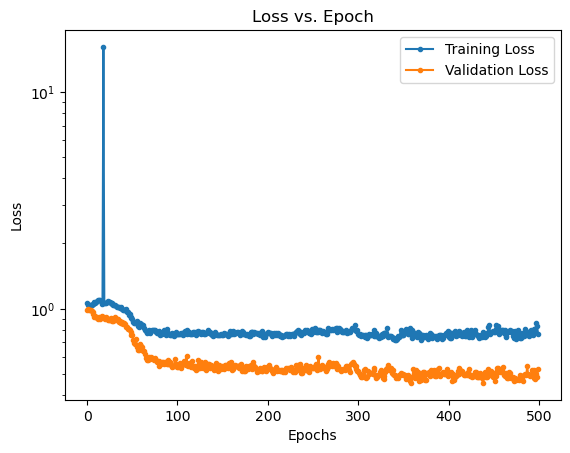

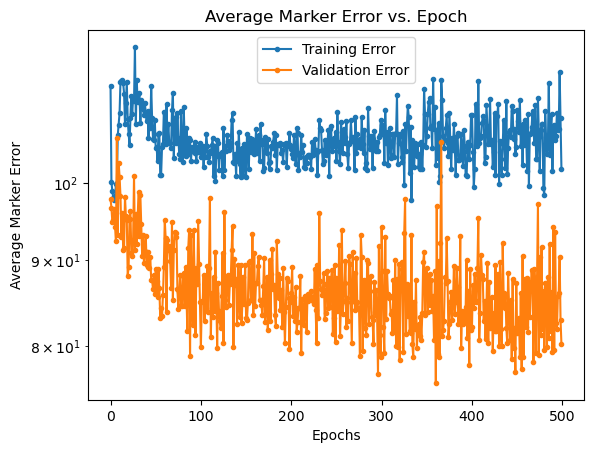

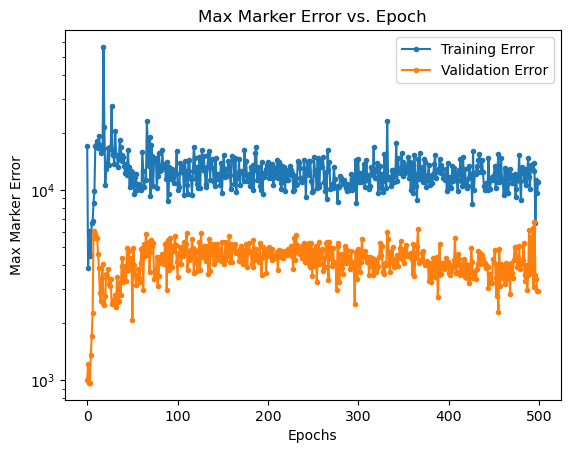

In [7]:
plt.plot(metrics['Training Loss'], label = 'Training Loss', marker = '.')
plt.plot(metrics['Validation Loss'], label = 'Validation Loss', marker = '.')
plt.yscale('log')
plt.title('Loss vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(metrics['Training Avg Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Avg Marker Error'], label = 'Validation Error', marker = '.')
plt.yscale('log')
plt.title('Average Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Average Marker Error')
plt.legend()
plt.show()

plt.plot(metrics['Training Max Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Max Marker Error'], label = 'Validation Error', marker = '.')
plt.yscale('log')
plt.title('Max Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Max Marker Error')
plt.legend()
plt.show()